<div class="alert alert-block alert-info">
    <strong>Autor:</strong> ANDRES ESPIN REARTE
</div>

# **Toma de decisiones en el diagnóstico de Insuficiencia Cardíaca (IC) con modelos predictivos basados en combinacion de modelos de clasificación.**
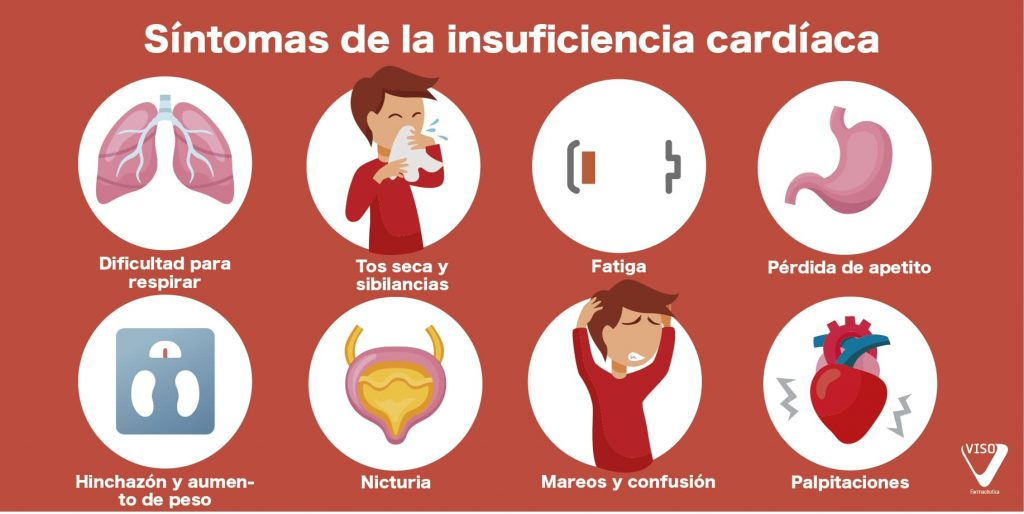



# 0. Introducción

## Objetivo
Desarrollo de una herramienta para la ayuda a la toma de decisiones en el diagnóstico de Insuficiencia Cardíaca (IC) utilizando modelos predictivos.

## Contenidos

Exploración y preprocesamiento de datos:

- Se realiza un análisis de datos exploratorio para comprender las características del conjunto de datos, incluida la verificación del desequilibrio de clases, la limpieza y preprocesado de los datos y el manejo de valores faltantes y codificación categórica.

Análisis estadístico para identificar el desequilibrio:

- Se utilizan métodos estadísticos para confirmar la presencia de desequilibrio de clases y se aplican técnicas apropiadas para abordar el desequilibrio.


División y estandarización de datos:

- Se dividen los datos en conjuntos de entrenamiento y prueba y se estandarizan las características para garantizar que el rendimiento del modelo no esté sesgado por la escala de los datos.

Construcción de modelos y ajuste de hiperparámetros:

- Se implementan varios clasificadores y se combinan con técnicas de conjuto en paralelo (árboles de decisión, Bagging, and Boosting), secuencialmente (KNN, SVM, Stacking, y Cascading) y dos redes nueronales con diferentes topologías en serie y paralelo.
- Se optimizan los clasificadores obtenidos utilizando la búsqueda con validación cruzada para ajustar los hiperparámetros.

Evaluación del modelo:

- Se evalúa el rendimiento del modelo utilizando métricas adecuadas y se compara el ejercicio de clasificadores individuales y el enfoque conjunto.

## Contexto: Infarto de Miocardio (IM):

El Infarto de Miocardio (IM) es uno de los problemas más desafiantes de la medicina moderna. El infarto agudo de miocardio se asocia con una alta mortalidad en el primer año posterior. La incidencia de IM sigue siendo alta en todos los países. Esto es especialmente cierto para la población urbana de países altamente desarrollados, expuesta a factores de estrés crónico, nutrición irregular y no siempre equilibrada. El curso de la enfermedad en pacientes con infarto de miocardio es distinto. El IM puede ocurrir sin complicaciones o con complicaciones que no empeoran el pronóstico a largo plazo. Al mismo tiempo, aproximadamente la mitad de los pacientes en los períodos agudo y subagudo tienen complicaciones que conducen al empeoramiento de la enfermedad e incluso a la muerte. Incluso un especialista experimentado no siempre puede prever el desarrollo de estas complicaciones. En este sentido, la predicción de las complicaciones del infarto de miocardio para realizar oportunamente las medidas preventivas necesarias es una tarea importante.

## Preparación del entorno

In [ ]:
pip install imbalanced-learn

In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
from matplotlib import pyplot as plt
from imblearn.over_sampling import SMOTE


%matplotlib inline

## Ruta de trabajo en Colab

Los puntos sucesivos en la línea de código:

os.listdir('/content/drive/MyDrive/...')

si se desa trabajar en Colab deben reemplazarse por la ruta en la carpeta de Drive que contenga los documentos de este proyecto.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.listdir('/content/drive/My Drive/Proyectos/Insuficiencia_Cardiaca/')

['M2.891_20232_PEC4-Enunciado-1.ipynb', 'MI_database_final.csv']

In [ ]:
import os
os.chdir('/content/drive/My Drive/Proyectos/Insuficiencia_Cardiaca/')


<a id="ex1"></a>

# 1. Carga y ajuste de la base de datos MI

Se realiza el análisis exploratorio a los datos para comprender sus características, incluida la verificación del desequilibrio de clases. eE limpian y preprocesan los datos, se analiza si hay valores faltantes y se realiza la codificación categórica.

## 1.1 Datos

La base de datos original consta de 1700 pacientes con 124 variables registradas. Hay valores ausentes y outlayers. En esta base de datos original, las columnas 2-112 son los descriptores o variables para predecir posibles complicaciones o respuestas que están en las columnas 113-124. La descripción detallada y los datos están disponibles en el siguiente [enlace](https://archive.ics.uci.edu/ml/datasets/Myocardial+infarction+complications#).

Los valores faltantes están ya imputados y los outlayers han sido eliminados e igualmente imputados. Además, las variables han sido reducidas a las más relevantes teniendo en cuenta que el <strong>outcome es ZSN_A</strong> que es una variable categórica y cuyo signnificado es la presencia de Insuficiencia Cardíaca (IC) crónica en la anamnesis.

En estos datos el <strong>outcome es ZSN_A</strong> contiene cinco diferentes resultados o gravedad de la afección:

1. **Clase 0**: Esta clase, es la más común y representa a pacientes sin complicaciones o con complicaciones leves después de un infarto de miocardio. Esto podría incluir pacientes que hayan recibido un tratamiento inmediato exitoso o aquellos con síntomas iniciales menos graves.

2. **Clase 1**: Puede indicar pacientes que tienen complicaciones moderadas, que posiblemente requieran intervenciones médicas adicionales, pero no necesariamente indica un mal pronóstico a largo plazo.

3. **Clase 2**: Puede representar complicaciones más graves que requieran una intervención médica mayor y podrían asociarse con un peor pronóstico que las clases 0 o 1.

4. **Clase 3**: esta clase, con relativamente pocos casos, puede denotar complicaciones críticas y potencialmente mortales que requieren cuidados intensivos.

5. **Clase 4**: El menos común, que posiblemente represente resultados fatales o pacientes con complicaciones extremadamente graves que conduzcan a otras fallas sistémicas.

Se realiza el análisis univariable, y se obtienen diagramas de distribución utilizando histogramas o diagramas de barras de acuerdo con la naturaleza de la variable.

Para identificar los valores extremos, se realizan diagramas de caja o box plot. Si existen, se eliminan y se considerarán como faltantes. En caso de necesidad de ajustar un nuevo valor se calcula utilizando la regresión lineal.

In [ ]:
MI_df = pd.read_csv('MI_database_final.csv')

In [ ]:
nRow, nCol = MI_df.shape
print(f'Hay {nRow} filas y {nCol} columnas')
MI_df.head()

Hay 1700 filas y 104 columnas


,ID,L_BLOOD,AGE,ALT_BLOOD,K_BLOOD,ROE,S_AD_ORIT,AST_BLOOD,Na_BLOOD,TIME_B_S,...,GIPER_Na,ritm_ecg_p_04,fibr_ter_03,GT_POST,fibr_ter_06,np09,zab_leg_04,n_r_ecg_p_02,n_p_ecg_p_05,ZSN_A
0,1,8.0,77.0,0.38,4.7,16.0,180.0,0.22,138.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,7.8,55.0,0.38,3.5,3.0,120.0,0.18,132.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,10.8,52.0,0.30,4.0,10.0,180.0,0.11,132.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,8.0,68.0,0.75,3.9,10.0,120.0,0.37,146.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,8.3,60.0,0.45,3.5,10.0,160.0,0.22,132.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
myseed = 13

## 1.2 Análisis descriptivo univariable

División de los datos en dos partes, **X** para todas las variables o características que no son el outcome y **y** para el outcome.

In [ ]:
X = MI_df.drop(columns=['ZSN_A', 'ID'])  # Se elimina la columna ID y ZSN_A de las características
Y = MI_df['ZSN_A']

print(f'Forma de X: {X.shape}')
print(f'Forma de Y: {Y.shape}')

Forma de X: (1700, 102)
Forma de Y: (1700,)


Cálculo de las frecuencias para el outcome ZSN_A.

In [ ]:
frecuencia_absoluta = MI_df['ZSN_A'].value_counts()
frecuencia_relativa = MI_df['ZSN_A'].value_counts(normalize=True)
frecuencia_absoluta_acumulada = frecuencia_absoluta.cumsum()
frecuencia_relativa_acumulada = frecuencia_relativa.cumsum()

tabla_frecuencias = pd.DataFrame({
    'Frecuencia Absoluta': frecuencia_absoluta,
    'Frecuencia Relativa': frecuencia_relativa,
    'Frecuencia Absoluta Acumulada': frecuencia_absoluta_acumulada,
    'Frecuencia Relativa Acumulada': frecuencia_relativa_acumulada
})

tabla_frecuencias

,Frecuencia Absoluta,Frecuencia Relativa,Frecuencia Absoluta Acumulada,Frecuencia Relativa Acumulada
ZSN_A,,,,
0.0,1522,0.895294,1522,0.895294
1.0,103,0.060588,1625,0.955882
3.0,29,0.017059,1654,0.972941
2.0,27,0.015882,1681,0.988824
4.0,19,0.011176,1700,1.000000


## 1.3 Medidas de tendencia central: media, mediana y moda

Las medidas de tendencia central, también conocidas como medidas de posición o localización, describen un valor en torno al que se encuentran las observaciones y pueden resumir la información de un conjunto de datos numéricos en un solo valor para obtener indicadores del comportamiento de la variable y poder realizar comparaciones.

**Media:** Se define como la suma de todos los valores de cada observación $(x_{i})$ dividido por el número total de observaciones del conjunto de datos ($N$).

**Media:** Es el dato que ocupa la posición central en la muestra ordenada de menor a mayor, es un punto que divide la muestra ordenada en dos grupos iguales (deja el 50% de los valores por debajo y el otro 50% por encima). Si $N$ es par, hay dos datos centrales, por tanto la mediana es la media de estos dos.

**Moda:** Es el valor con mayor frecuencia absoluta en los datos obtenidos, indica cuál es el valor más frecuente pero no cuántas veces se repite. Si hay más de dos valores que se repiten con mayor frecuencia, se dice que los datos son multimodales.

Se calculan estas medidas para la variable AGE y K_BLOOD.

In [ ]:
media_age = MI_df['AGE'].mean()
mediana_age = MI_df['AGE'].median()
moda_age = MI_df['AGE'].mode()[0]

media_k_blood = MI_df['K_BLOOD'].mean()
mediana_k_blood = MI_df['K_BLOOD'].median()
moda_k_blood = MI_df['K_BLOOD'].mode()[0]

print(f"Para la variable AGE:\nMedia: {media_age}\nMediana: {mediana_age}\nModa: {moda_age}")
print(f"\nPara la variable K_BLOOD:\nMedia: {media_k_blood}\nMediana: {mediana_k_blood}\nModa: {moda_k_blood}")


Para la variable AGE:
Media: 61.86235294117647
Mediana: 63.0
Moda: 63.0

Para la variable K_BLOOD:
Media: 4.1714705882352945
Mediana: 4.1
Moda: 4.1


## 1.4 Medidas de posición: cuartiles, deciles y percentiles

Los cuantiles son valores de la lista de datos que la dividen en partes iguales, es decir, en intervalos que comprenden el mismo número de valores. Los más usados son los percentiles, los deciles y los cuartiles. Los percentiles son 99 valores que dividen en cien partes iguales al conjunto de datos ordenados.

Se calculan estas medidas para la variable L_BLOOD.

In [ ]:
percentiles = MI_df['L_BLOOD'].quantile([0.01 * i for i in range(1, 100)])
print("Percentiles:\n", percentiles)

deciles = MI_df['L_BLOOD'].quantile([0.1 * i for i in range(1, 10)])
print("Deciles:\n", deciles)

cuartiles = MI_df['L_BLOOD'].quantile([0.25, 0.5, 0.75])
print("Cuartiles:\n", cuartiles)

Percentiles:
 0.01     4.000
0.02     4.200
0.03     4.400
0.04     4.600
0.05     4.795
         ...  
0.95    15.205
0.96    15.904
0.97    16.700
0.98    17.702
0.99    20.101
Name: L_BLOOD, Length: 99, dtype: float64
Deciles:
 0.1     5.3
0.2     6.1
0.3     6.9
0.4     7.5
0.5     8.0
0.6     8.6
0.7     9.6
0.8    10.9
0.9    12.9
Name: L_BLOOD, dtype: float64
Cuartiles:
 0.25     6.6
0.50     8.0
0.75    10.2
Name: L_BLOOD, dtype: float64


## 1.5 Medidas de dispersión: desviación típica, rango, IQR, varianza

Las medidas de dispersión o variabilidad describen que tan cerca están los datos entre ellos, o de alguna medida de tendencia central.

**Rango:** Es el intervalo entre el valor máximo y el valor mínimo del conjunto de datos. Es altamente sensible a los valores extremos, es decir, es un parámetro estadístico débil.

**Rango intercuartílico:** Es la extensión cubierta por la mitad central de los datos ordenados, excluyendo la cuarta parte inicial (las que son inferiores al primer cuartil) y la cuarta parte final (las que son superiores al tercer cuartil).

**Varianza y desviación típica:** Estas medidas miden lo lejos que difieren los datos de la media. Específicamente, expresan "la media de la distancia de cada punto respecto a la media".

La varianza se calcula según:
$$\sigma^{2}=\frac{1}{N}\sum_{i=1}^{N}(x_{i}-\bar{X})^{2},$$
donde $x_{i}$ es el valor de cada observación, $\overline{X}$ es la media y $N$ es el número total de datos. Nótese que las unidades de la varianza están expresadas al cuadrado, por tanto, si se tienen datos de longitud (en $mm$), la varianza resulta con unidades de superficie (en $mm^{2}$), lo que no tiene mucho sentido.

Por tanto, se dispone de la desviación estándar o típica que no es más que la raíz cuadrada de la varianza; así, las unidades de la medida de dispersión son las mismas de los datos.

$$\sigma=\sqrt{\sigma^{2}}=\sqrt{\frac{1}{N}\sum_{i=1}^{N}\left(x_{i}-\bar{X }\right)^{2}}$$

En `pandas` la desviación estándar y la varianza se pueden calcular mediante los métodos `std(ddof=1)` y `var(ddof=1)` respectivamente, donde el valor de `ddof` indica los grados de libertad, es a decir , utiliza $N-ddof$ en el denominador en lugar de $N$ para poder utilizarlas como estimadores no sesgados en inferencia estadística. Estas medidas se conocen como varianza y desviación típica corregidas.

Se calculan estas medidas para la variable ROE.

In [ ]:
rango = MI_df['ROE'].max() - MI_df['ROE'].min()
print("Rango:", rango)

Q1 = MI_df['ROE'].quantile(0.25)
Q3 = MI_df['ROE'].quantile(0.75)
IQR = Q3 - Q1
print("Rango Intercuartílico (IQR):", IQR)

varianza = MI_df['ROE'].var(ddof=1)
print("Varianza:", varianza)

desviacion_estandar = MI_df['ROE'].std(ddof=1)
print("Desviación Estándar:", desviacion_estandar)

Rango: 139.0
Rango Intercuartílico (IQR): 11.0
Varianza: 113.60864557005851
Desviación Estándar: 10.658735645941244


## 1.6 Medidas de asimetría (skewness) y apuntalamiento (curtosis)

Estas medidas dan una idea de la forma de distribución de frecuencias de una variable con número. Obviamente, la gráfica de la distribución es más clara, pero en algunos casos, el número puede ser muy útil para tomar una decisión.

**Simetría (*skewness*):** Una distribución de frecuencias es simétrica si la media es igual a la mediana, en otro caso, la distribución es asimétrica. Si la media es menor a la media, la distribución es asimétrica a la izquierda (de cola izquierda o negativa) e indica que los valores están más reunidos en niveles superiores a la media. En el caso opuesto, la distribución es asimétrica a la derecha (de cola derecha o positiva), es decir, tiende a reunirse más a la derecha de la media, en valores altos.

**Apuntalamiento (*curtosis*):** El grado de “punta” o “chafamiento” de la distribución de una variable con relación a la distribución normal se cuantifica por medio de este estadístico. En una distribución normal estándar la cortosis es igual a 3 (Mesocúrtica). Una mayor cortosis indica una distribución que perfila un gráfico “más en punta” (Leptocúrtica). Una curtosis menor que 3 o negativa indica una distribución relativamente más achatada (Platicúrtica).

Se calculan estas medidas para la variable AGE.

In [ ]:
simetria_age = MI_df['AGE'].skew()
print("Simetría de AGE:", simetria_age)

apuntalamiento_age = MI_df['AGE'].kurtosis()
print("Apuntalamiento de AGE:", apuntalamiento_age)

Simetría de AGE: -0.22169097951636574
Apuntalamiento de AGE: -0.17036404643751668


## 1.7 Resumen de todas las estadísticas

El método `describe()` nos proporciona una visión general rápida de los datos numéricos del `DataFrame`.

Se calculan estas medidas para la variable AGE.

In [ ]:
age_description = MI_df['AGE'].describe()
print(age_description)

count    1700.000000
mean       61.862353
std        11.233668
min        26.000000
25%        54.000000
50%        63.000000
75%        70.000000
max        92.000000
Name: AGE, dtype: float64


Se definen combinaciones específicas de estadísticas agregadas para columnas dadas usando el método DataFrame.agg().

Se calculan de estas medidas el mínimo, máximo, la media, la mediana, la desviación típica, el coeficiente de skewness y de cortos para la variable ALT_BLOOD.

In [ ]:
agg_result = MI_df['ALT_BLOOD'].agg(['min', 'max', 'mean', 'median', 'std', 'skew', 'kurtosis'])

print(agg_result)

min         0.030000
max         3.000000
mean        0.464506
median      0.380000
std         0.355437
skew        2.583580
kurtosis    9.172009
Name: ALT_BLOOD, dtype: float64


Finalmente, se observan las medias de los estadísticos para todas las variables del conjunto de datos.

In [ ]:
description = MI_df.describe()
description

,ID,L_BLOOD,AGE,ALT_BLOOD,K_BLOOD,ROE,S_AD_ORIT,AST_BLOOD,Na_BLOOD,TIME_B_S,...,GIPER_Na,ritm_ecg_p_04,fibr_ter_03,GT_POST,fibr_ter_06,np09,zab_leg_04,n_r_ecg_p_02,n_p_ecg_p_05,ZSN_A
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,...,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,850.500000,8.725347,61.862353,0.464506,4.171471,13.033529,133.867647,0.256388,136.429412,4.633529,...,0.017647,0.013529,0.040000,0.004706,0.005294,0.001176,0.005294,0.004706,0.001176,0.188235
std,490.892045,3.279450,11.233668,0.355437,0.667750,10.658736,28.828359,0.184823,5.753241,2.768345,...,0.131704,0.115560,0.196017,0.068458,0.072589,0.034290,0.072589,0.068458,0.034290,0.649065
min,1.000000,2.000000,26.000000,0.030000,2.300000,1.000000,0.000000,0.040000,117.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,425.750000,6.600000,54.000000,0.230000,3.800000,6.000000,120.000000,0.150000,134.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,850.500000,8.000000,63.000000,0.380000,4.100000,10.000000,130.000000,0.220000,136.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1275.250000,10.200000,70.000000,0.520000,4.500000,17.000000,150.000000,0.300000,140.000000,7.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1700.000000,27.900000,92.000000,3.000000,8.200000,140.000000,260.000000,2.150000,169.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


## 1.8 Análisis gráfico univariable

### 1.8.1 Gráfico de barras

Este gráfico representa visualmente la frecuencia de variables categóricas mediante barras rectangulares de la misma anchura. A cada categoría o clase de la variable se le asocia una barra cuya altura representa la frecuencia absoluta o la frecuencia relativa de esa clase.

Se utiliza el outcome ZSN_A, al cual previamente ha encontrado sus frecuencias, para representarlo por medio de la gráfica de barras.

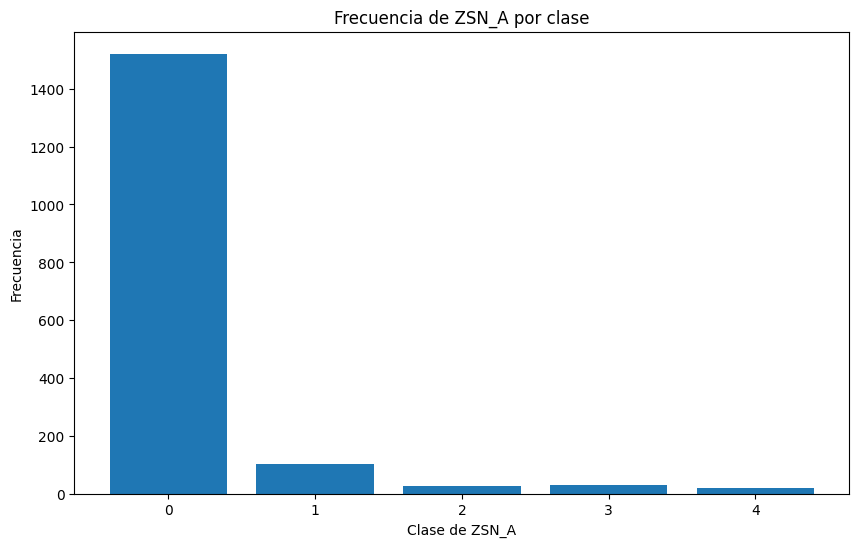

In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(frecuencia_absoluta.index, frecuencia_absoluta.values)
plt.xlabel('Clase de ZSN_A')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de ZSN_A por clase')
plt.xticks(frecuencia_absoluta.index)
plt.show()

### 1.8.2 Diagrama de sectores

Este gráfico se representa como un círculo dividido en porciones, y éstas son proporcionales a la frecuencia relativa de cada categoría.

Se realiza el diagrama para el outcome ZSN_A.

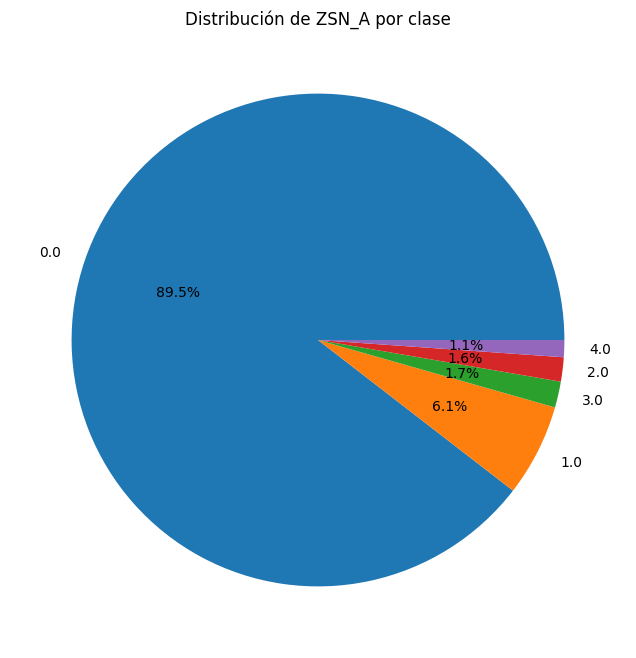

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(frecuencia_relativa, labels=frecuencia_relativa.index, autopct='%1.1f%%')
plt.title('Distribución de ZSN_A por clase')
plt.show()

### 1.8.3 Histograma

Es la gráfica adecuada para representar variables cuantitativas con un gran número de valores distintos. Los datos se agrupan en intervalos y se representan gráficamente por rectángulos cuyas alturas son tales que el área de cada rectángulo sea proporcional a la frecuencia de cada intervalo. Si todos los intervalos tienen la misma longitud, entonces la altura de cada rectángulo es proporcional a la frecuencia el intervalo. Para evitar confusiones, la principal diferencia con el gráfico de barras es la inexistencia de espacios entre rectángulos.

Se realiza el histograma para la variable AGE.

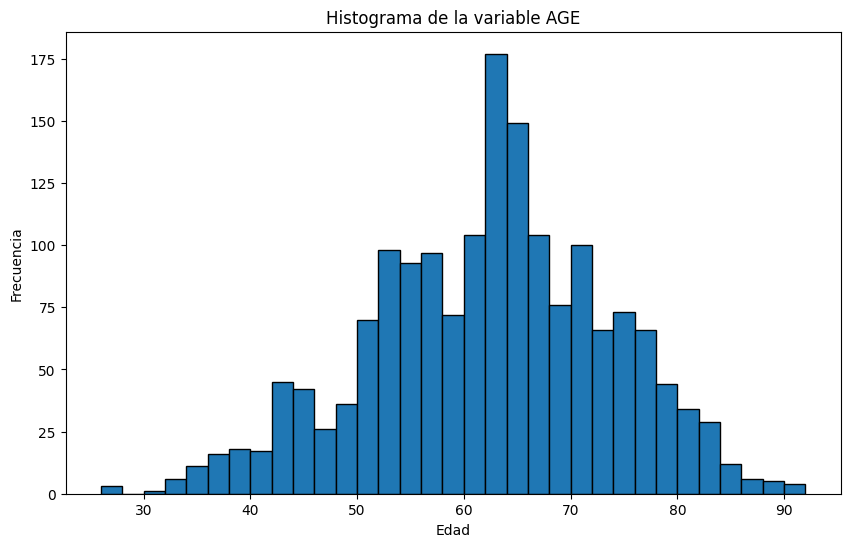

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(MI_df['AGE'], bins=33, edgecolor='black')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Histograma de la variable AGE')
plt.show()

### 1.8.4 Estimación de densidad de Kernel

Un histograma tiene como objetivo aproximar la función de densidad de probabilidad subyacente que generó los datos al agrupar y contar las observaciones. La estimación de la densidad del núcleo (KDE) presenta una solución distinta del mismo problema. En lugar de utilizar contenedores discretos, un gráfico de KDE suaviza las observaciones con un núcleo gaussiano, produciendo una estimación de densidad continua.

Se realiza la estimación de densidad para la variable AGE

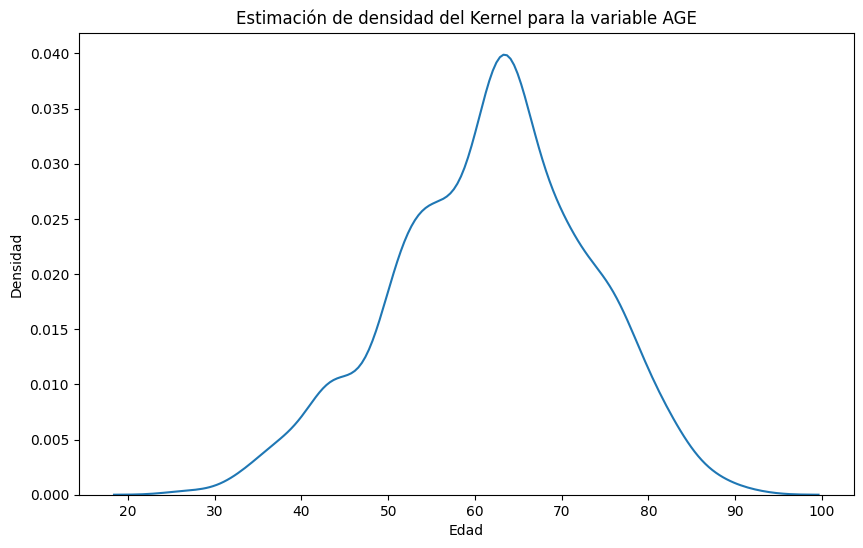

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(MI_df['AGE'])
plt.xlabel('Edad')
plt.ylabel('Densidad')
plt.title('Estimación de densidad del Kernel para la variable AGE')
plt.show()

### 1.8.5 Diagrama de cajas

Los diagramas de caja ofrecen una representación gráfica compacta y eficiente de distribuciones de datos, encapsulando características fundamentales como la mediana (tendencia central), la dispersión, la simetría y los valores atípicos. Estos gráficos utilizan una caja para mostrar el rango intercuartílico (IQR), que abarca desde el primer cuartil (Q1) hasta el tercer cuartil (Q3), destacando así la mitad central de la distribución. La línea dentro de la caja marca la media (Q2), proporcionando un claro indicador visual de la tendencia central.

Los bigotes del diagrama se extienden desde la caja hasta los valores mínimo y máximo que caen dentro de un límite determinado, típicamente 1.5 veces el IQR a partir de los bordes de la caja con el propósito es identificar los rangos típicos de la variabilidad de los datos. Los datos que se encuentran más allá de los extremos de los bigotes se consideran valores atípicos y se representan comúnmente con puntos individuales, indicando observaciones que difieren significativamente del resto de la distribución.

Se realiza esta representación gráfica para la variable AGE:

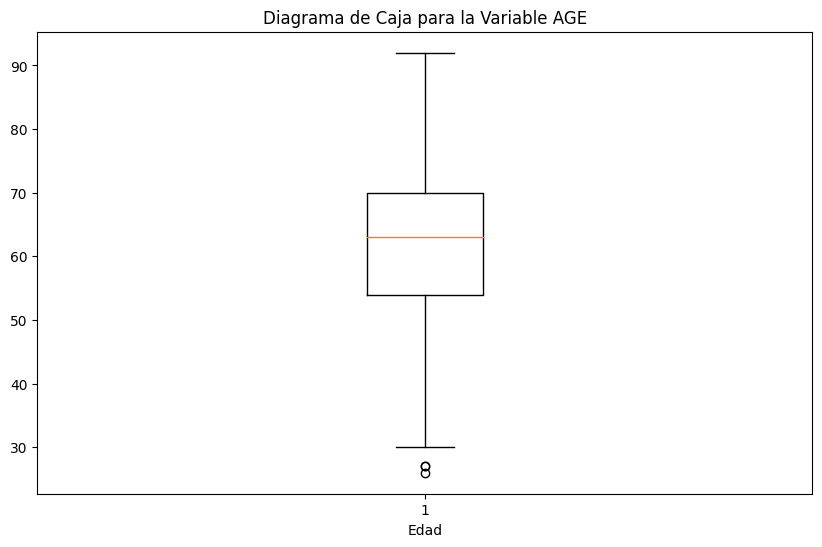

In [ ]:
plt.figure(figsize=(10, 6))
plt.boxplot(MI_df['AGE'])
plt.xlabel('Edad')
plt.title('Diagrama de Caja para la Variable AGE')
plt.show()

Se seleccionan algunas variables para crear la gráfica box plot: L_BLOOD, AGE, ALT_BLOOD,K_BLOOD,ROE,S_AD_ORIT,AST_BLOOD,Na_BLOOD,TIME_B_S.

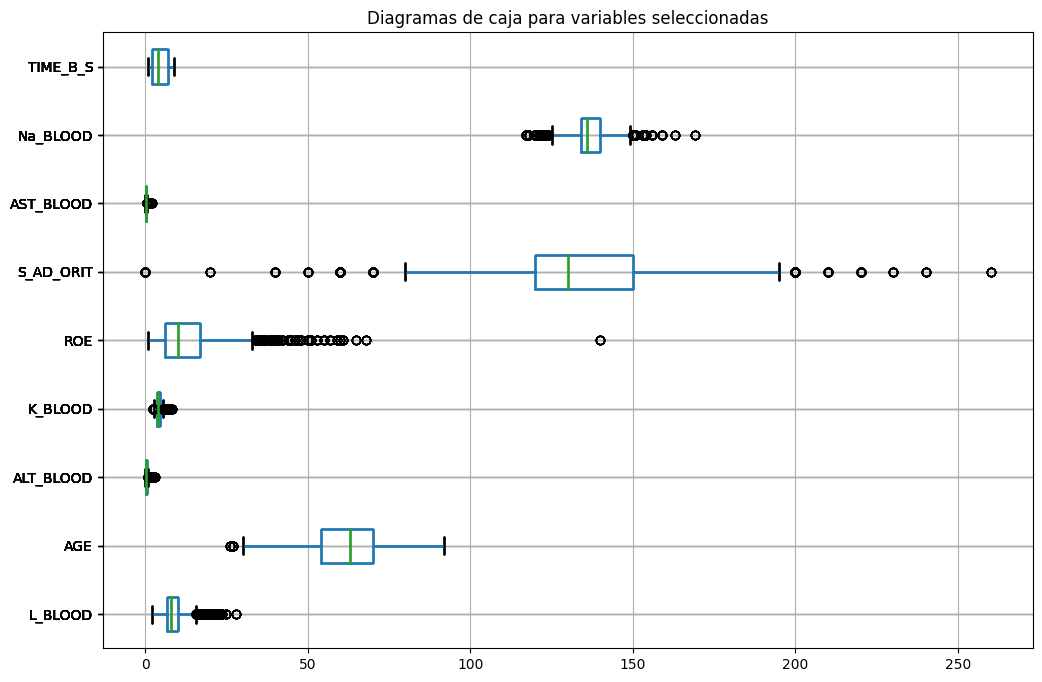

In [ ]:
variables = ['L_BLOOD', 'AGE', 'ALT_BLOOD', 'K_BLOOD', 'ROE', 'S_AD_ORIT', 'AST_BLOOD', 'Na_BLOOD', 'TIME_B_S']

plt.figure(figsize=(12, 8))
for var in variables:
    MI_df.boxplot(column=variables, vert=False)
plt.title('Diagramas de caja para variables seleccionadas')
plt.show()

### 1.8.6 Diagrama de violín

El diagrama de violín combina las características informativas del diagrama de caja con la estimación de densidad de kernel para proporcionar una vista más rica y detallada de la distribución de los datos. Este tipo de gráfico no solo destaca la mediana, el rango intercuartílico y los valores atípicos, sino que también ofrece una representación suavizada de la densidad de los datos en diferentes valores, reflejando la probabilidad de encontrar puntos de datos en cualquier región específica de la distribución.

Sw realiza esta representación gráfica para la variable AGE:

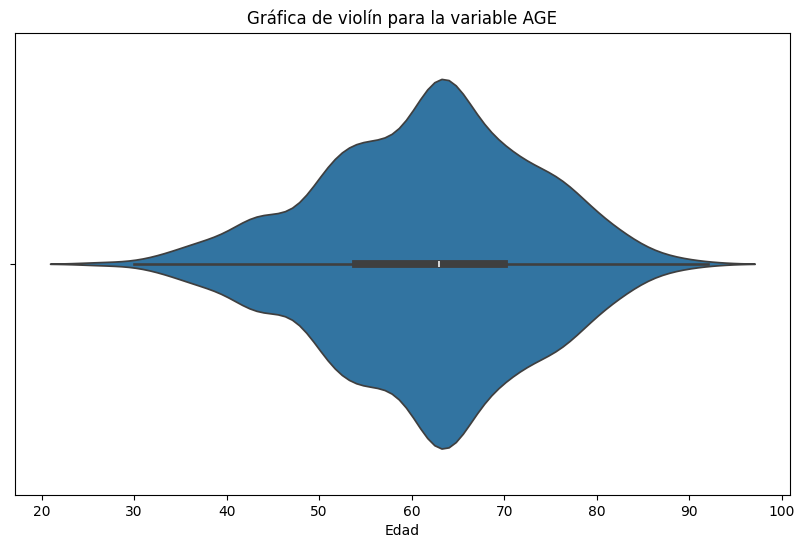

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x=MI_df['AGE'])
plt.xlabel('Edad')
plt.title('Gráfica de violín para la variable AGE')
plt.show()


Con las variables seleccionadas anteriormente, se realiza el diagrama de violín.

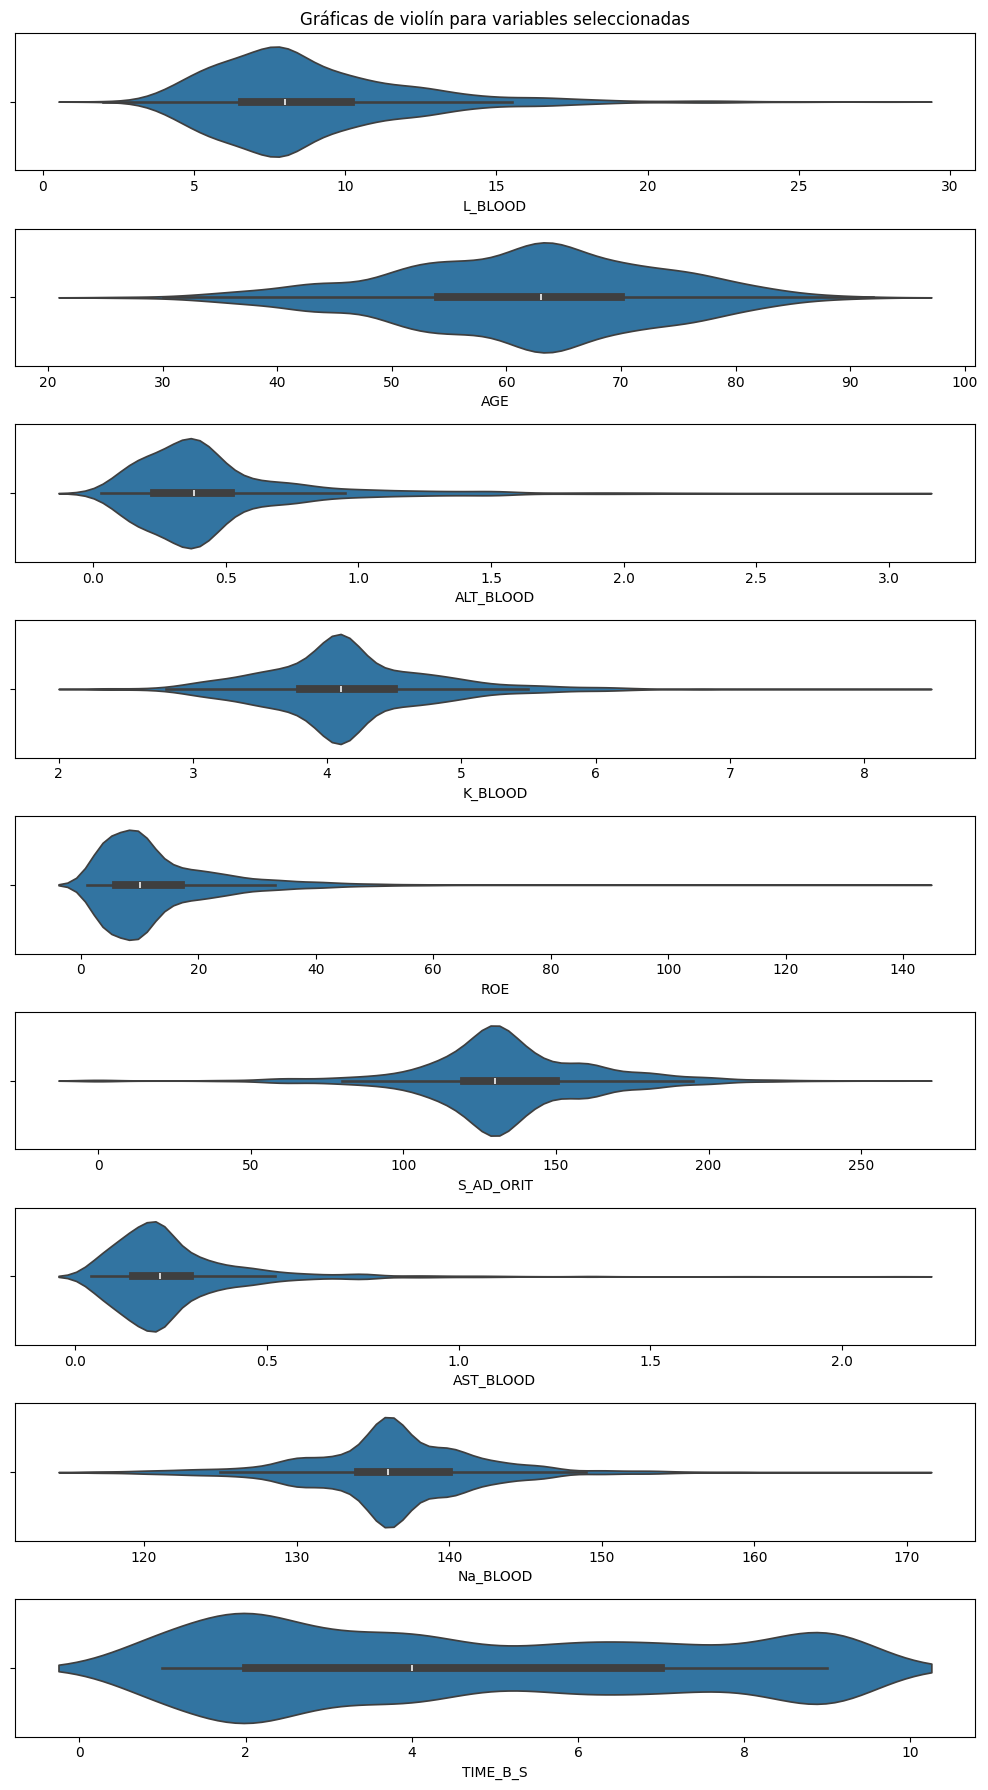

In [ ]:
plt.figure(figsize=(10, 18))
for i, var in enumerate(variables, 1):
     plt.subplot(len(variables), 1, i)
     sns.violinplot(x=MI_df[var])
     plt.xlabel(var)
     if i == 1:
          plt.title('Gráficas de violín para variables seleccionadas')
plt.tight_layout()
plt.show()

Para probar varios modelos, primero se va a dividir el dataset entre train y test. Para que se obtenga en cada ejecución los mismos resultados se fija la seed de manera que siempre se obtienen los mismos datasets de train y test.

Se trata aqui ***Stacking*** y ***Cascading***, y ambos se aplican sobre el conjunto de test, haciendo un split del 60% para tener un poco más de base al aplicar estas dos técnicas.

## 1.9 Análisis bivariable
Se utiliza ánálisis bivariable para encontrar la relación existente entre dos variable, ya sean ambas categóricas, ambas numéricas o combinación entre ellas. Se realiza gráficamente mediante diagramas de dispersión (para analizar dos variables numéricas y observar la relación lineal o no lineal entre las variables), o mediante los gráficos de barras (para comprender la relación entre dos variables categóricas); o evaluando los **Coeficientes de correlación** que cuantifican la intensidad de la relación lineal entre dos variables.

Se realiza un histplot utilizando la variable AGE, *stat=probability*, igualmente incluyendo el outcome ZSN_A y *kde=True*:

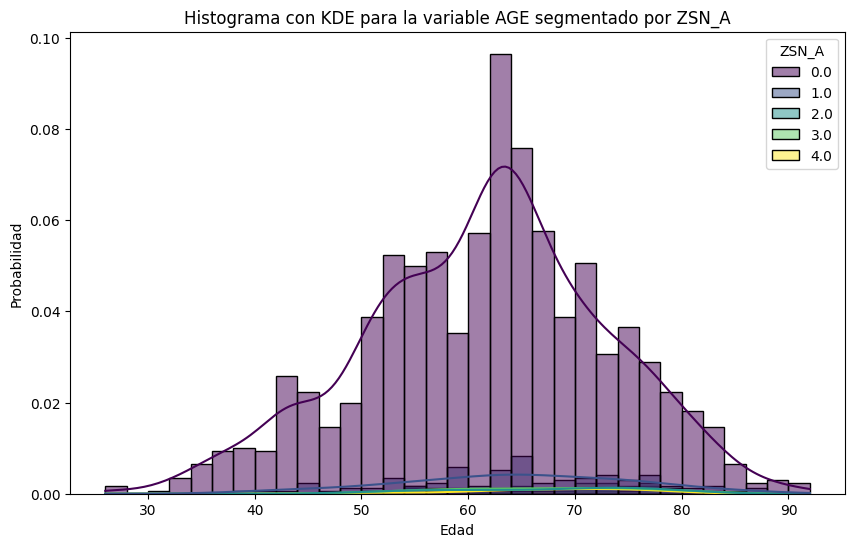

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=MI_df, bins=33, x='AGE', hue='ZSN_A', kde=True, stat='probability', palette='viridis')
plt.xlabel('Edad')
plt.ylabel('Probabilidad')
plt.title('Histograma con KDE para la variable AGE segmentado por ZSN_A')
plt.show()

Se realiza el pairplot, utilizando algunas variables seleccionadas y teniendo en cuenta el outcome ZSN_A.

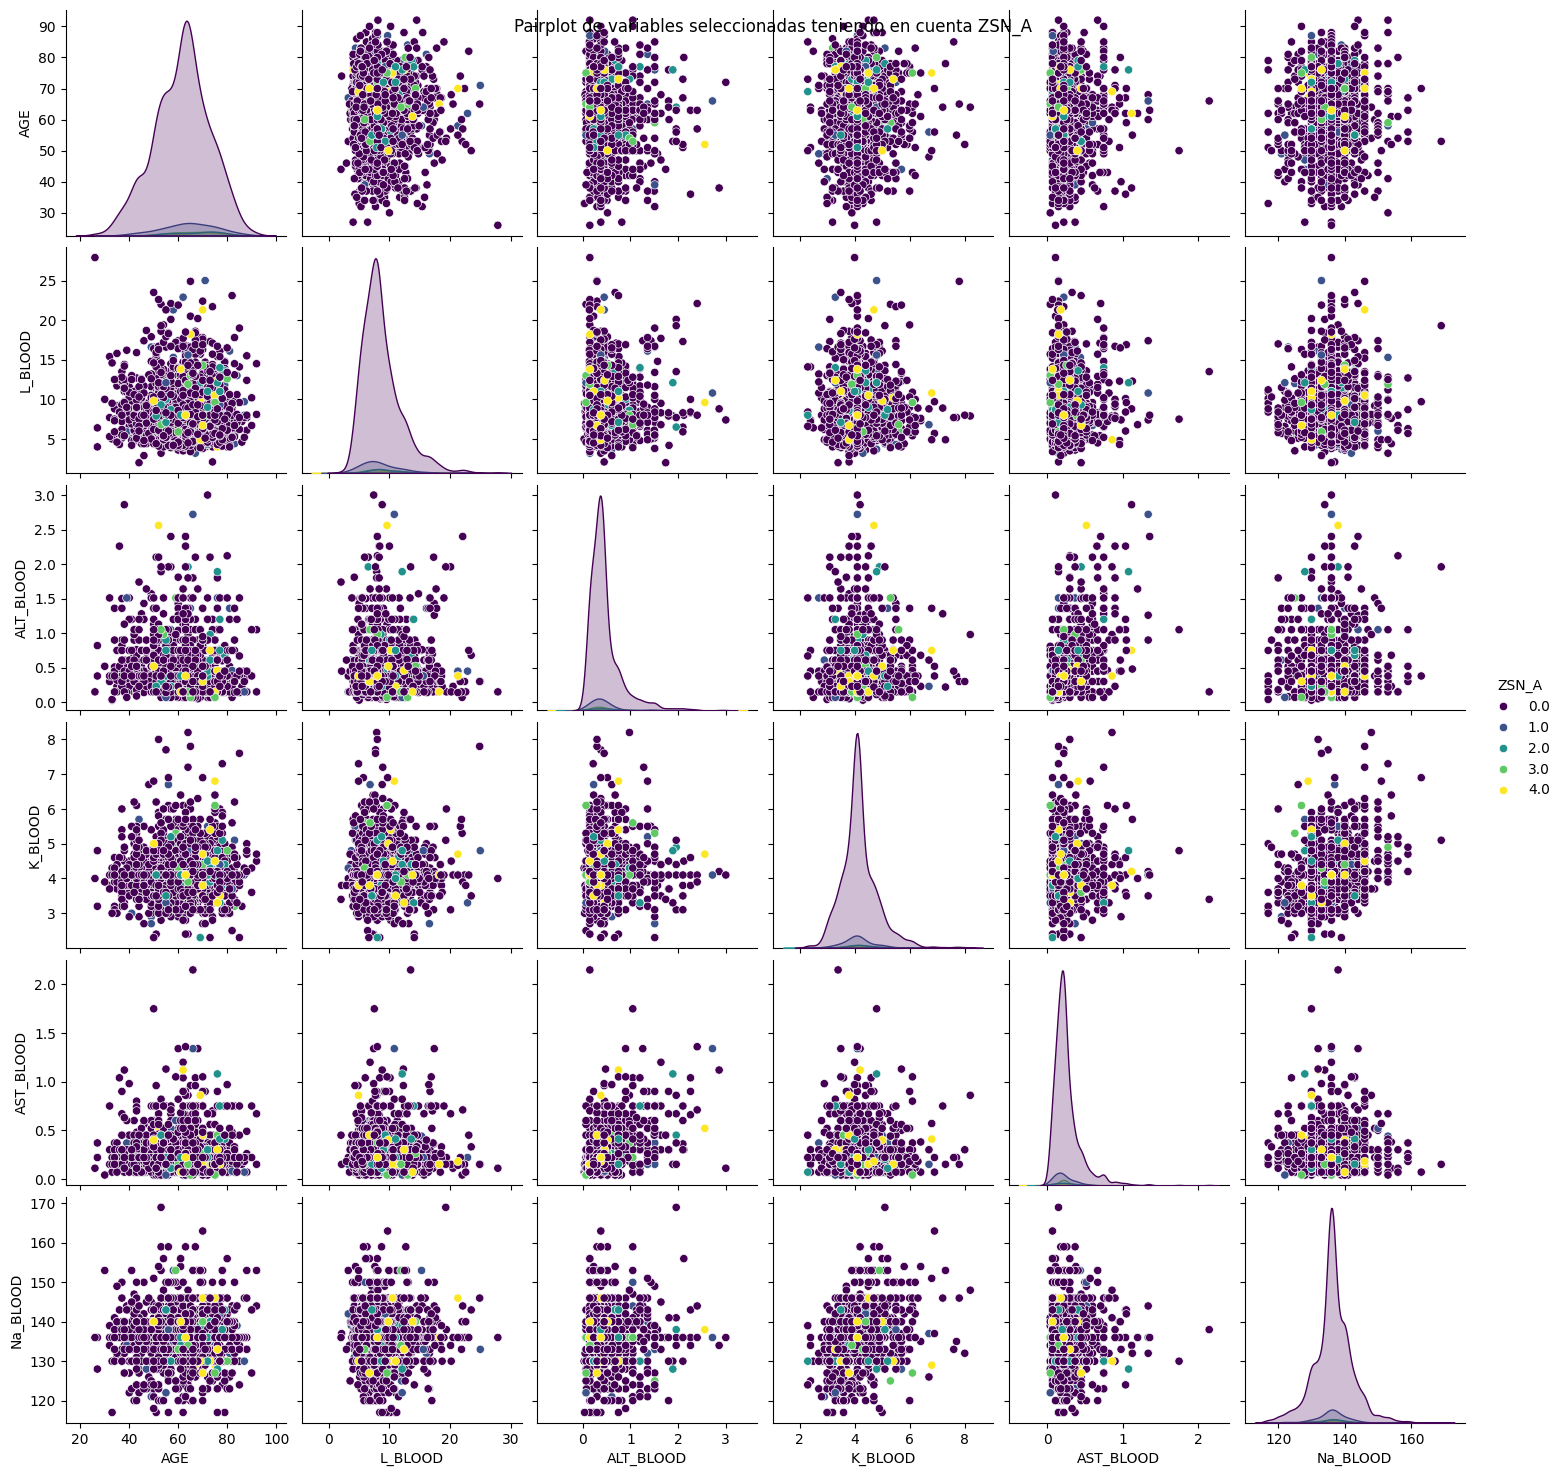

In [ ]:
variables = ['AGE', 'L_BLOOD', 'ALT_BLOOD', 'K_BLOOD', 'AST_BLOOD', 'Na_BLOOD', 'ZSN_A']
sns.pairplot(MI_df[variables], hue='ZSN_A', palette='viridis')
plt.suptitle('Pairplot de variables seleccionadas teniendo en cuenta ZSN_A')
plt.show()

Se realiza el scatter plot entre las variables K_BLOOD y L_BLOOD teniendo en cuenta el outcome ZSN_A.

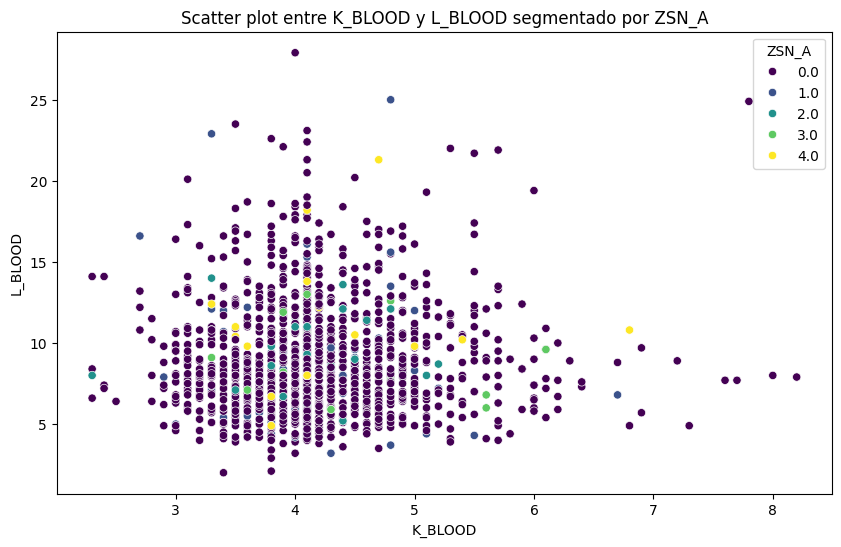

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=MI_df, x='K_BLOOD', y='L_BLOOD', hue='ZSN_A', palette='viridis')
plt.xlabel('K_BLOOD')
plt.ylabel('L_BLOOD')
plt.title('Scatter plot entre K_BLOOD y L_BLOOD segmentado por ZSN_A')
plt.show()

 Utilizando la librería ***Seaborn*** se realiza una distribución bivariada entre las variables ROE y AST_BLOOD teniendo en cuenta el outcome ZSN_A:

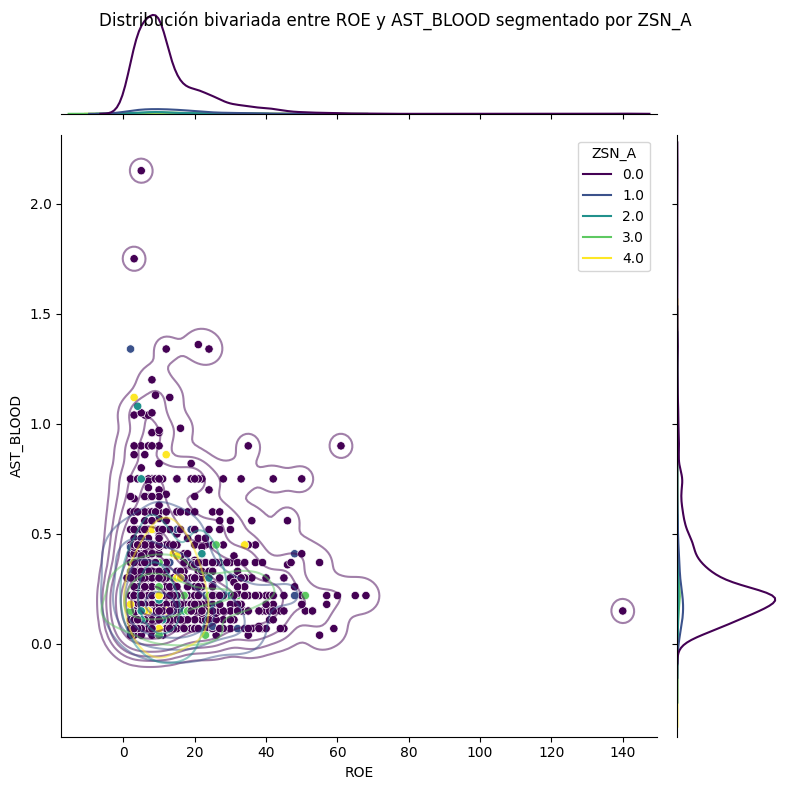

In [ ]:
g = sns.JointGrid(data=MI_df, x='ROE', y='AST_BLOOD', hue='ZSN_A', palette='viridis', height=8)
g = g.plot(sns.scatterplot, sns.kdeplot)
g.plot_joint(sns.kdeplot, alpha=0.5, levels=10)
g.set_axis_labels('ROE', 'AST_BLOOD')
plt.suptitle('Distribución bivariada entre ROE y AST_BLOOD segmentado por ZSN_A')
plt.show()

### Coeficientes de correlación

Al hacer un diagrama de dispersión entre dos variables se puede identificar tres tipos de correlación entre ellas:

**Correlación negativa:** Los valores de `y` tienden a disminuir a medida que aumentan los valores de `x`. Esto muestra una fuerte correlación negativa, que ocurre cuando valores grandes de una característica corresponden a valores pequeños de la otra, y viceversa.

**Débil o sin correlación:** No muestra una tendencia obvia. Esta es una forma de correlación débil, que ocurre cuando una asociación entre dos características no es obvia o es difícilmente observable.

**Correlación positiva:** Los valores de `y` tienden a aumentar a medida que aumentan los valores de `x`. Esto ilustra una fuerte correlación positiva, que ocurre cuando valores grandes de una característica corresponden a valores grandes de la otra, y viceversa.

Cuando se analiza la correlación, siempre se debe tener en cuenta que la correlación no indica causalidad; cuantifica la fuerza de la relación entre las características de un conjunto de datos. A veces, la asociación es causada por un factor común a varias características.

Se usa el método `.corr()` de `Pandas` para calcular tres coeficientes de correlación (Pearson, Spearman y Kendall).

In [ ]:
pearson_corr = MI_df[variables].corr(method='pearson')
print("Correlación de Pearson:")
print(pearson_corr)

Correlación de Pearson:
                AGE   L_BLOOD  ALT_BLOOD   K_BLOOD  AST_BLOOD  Na_BLOOD  \
AGE        1.000000  0.001554  -0.100174 -0.006518  -0.052900  0.025094   
L_BLOOD    0.001554  1.000000   0.044013  0.014832   0.075467  0.014114   
ALT_BLOOD -0.100174  0.044013   1.000000  0.019434   0.522017 -0.009438   
K_BLOOD   -0.006518  0.014832   0.019434  1.000000   0.046188  0.300705   
AST_BLOOD -0.052900  0.075467   0.522017  0.046188   1.000000 -0.022359   
Na_BLOOD   0.025094  0.014114  -0.009438  0.300705  -0.022359  1.000000   
ZSN_A      0.120281  0.048912   0.009486  0.020274  -0.001787 -0.018979   

              ZSN_A  
AGE        0.120281  
L_BLOOD    0.048912  
ALT_BLOOD  0.009486  
K_BLOOD    0.020274  
AST_BLOOD -0.001787  
Na_BLOOD  -0.018979  
ZSN_A      1.000000  


In [ ]:
spearman_corr = MI_df[variables].corr(method='spearman')
print("Correlación de Spearman:")
print(spearman_corr)

Correlación de Spearman:
                AGE   L_BLOOD  ALT_BLOOD   K_BLOOD  AST_BLOOD  Na_BLOOD  \
AGE        1.000000  0.012622  -0.115943 -0.018558  -0.074974  0.007550   
L_BLOOD    0.012622  1.000000   0.010579  0.008495   0.040632 -0.007923   
ALT_BLOOD -0.115943  0.010579   1.000000  0.021411   0.509998  0.012675   
K_BLOOD   -0.018558  0.008495   0.021411  1.000000   0.038051  0.287098   
AST_BLOOD -0.074974  0.040632   0.509998  0.038051   1.000000 -0.000694   
Na_BLOOD   0.007550 -0.007923   0.012675  0.287098  -0.000694  1.000000   
ZSN_A      0.121550  0.038419  -0.004886  0.011426  -0.030352 -0.017657   

              ZSN_A  
AGE        0.121550  
L_BLOOD    0.038419  
ALT_BLOOD -0.004886  
K_BLOOD    0.011426  
AST_BLOOD -0.030352  
Na_BLOOD  -0.017657  
ZSN_A      1.000000  


In [ ]:
kendall_corr = MI_df[variables].corr(method='kendall')
print("Correlación de Kendall:")
print(kendall_corr)

Correlación de Kendall:
                AGE   L_BLOOD  ALT_BLOOD   K_BLOOD  AST_BLOOD  Na_BLOOD  \
AGE        1.000000  0.008352  -0.082974 -0.012769  -0.053246  0.005201   
L_BLOOD    0.008352  1.000000   0.007379  0.005844   0.028862 -0.005574   
ALT_BLOOD -0.082974  0.007379   1.000000  0.015101   0.409324  0.010793   
K_BLOOD   -0.012769  0.005844   0.015101  1.000000   0.028866  0.218048   
AST_BLOOD -0.053246  0.028862   0.409324  0.028866   1.000000  0.000660   
Na_BLOOD   0.005201 -0.005574   0.010793  0.218048   0.000660  1.000000   
ZSN_A      0.098885  0.031109  -0.004121  0.009588  -0.025724 -0.015136   

              ZSN_A  
AGE        0.098885  
L_BLOOD    0.031109  
ALT_BLOOD -0.004121  
K_BLOOD    0.009588  
AST_BLOOD -0.025724  
Na_BLOOD  -0.015136  
ZSN_A      1.000000  


A cotinuación, en lugar de utilizar los métodos estándar de correlación (como Pearson, Spearman o Kendall), se define y usa la función personalizada llamada *histogram_intersection* para calcular la correlación.

Esta operación no es una medida de correlación en el sentido tradicional (como Pearson, que mide la relación lineal entre variables), sino más bien una medida de la cantidad de intersección o solapamiento entre los valores de dos variables.

In [ ]:
def histogram_intersection(a, b, bins=10):
    hist_a, _ = np.histogram(a, bins=bins, range=(min(a.min(), b.min()), max(a.max(), b.max())))
    hist_b, _ = np.histogram(b, bins=bins, range=(min(a.min(), b.min()), max(a.max(), b.max())))

    minima = np.minimum(hist_a, hist_b)
    intersection = np.sum(minima) / np.sum(hist_a)

    return intersection


correlation_matrix = pd.DataFrame(index=variables, columns=variables)

for var1 in variables:
        for var2 in variables:
            if var1 == var2:
                correlation_matrix.loc[var1, var2] = 1.0
            else:
                correlation_matrix.loc[var1, var2] = histogram_intersection(MI_df[var1], MI_df[var2])

print("Matriz de correlación utilizando histogram_intersection:")
print(correlation_matrix)

Matriz de correlación utilizando histogram_intersection:
                AGE   L_BLOOD ALT_BLOOD   K_BLOOD AST_BLOOD Na_BLOOD     ZSN_A
AGE             1.0  0.001765       0.0       0.0       0.0      0.0       0.0
L_BLOOD    0.001765       1.0  0.002353  0.255882  0.001176      0.0  0.029412
ALT_BLOOD       0.0  0.002353       1.0  0.006471  0.589412      0.0      0.69
K_BLOOD         0.0  0.255882  0.006471       1.0  0.001176      0.0  0.032353
AST_BLOOD       0.0  0.001176  0.589412  0.001176       1.0      0.0  0.875882
Na_BLOOD        0.0       0.0       0.0       0.0       0.0      1.0       0.0
ZSN_A           0.0  0.029412      0.69  0.032353  0.875882      0.0       1.0


Finalmente, se visualiza la matrix de correlaciones utilizando un mapa de calor "*heatmap*".

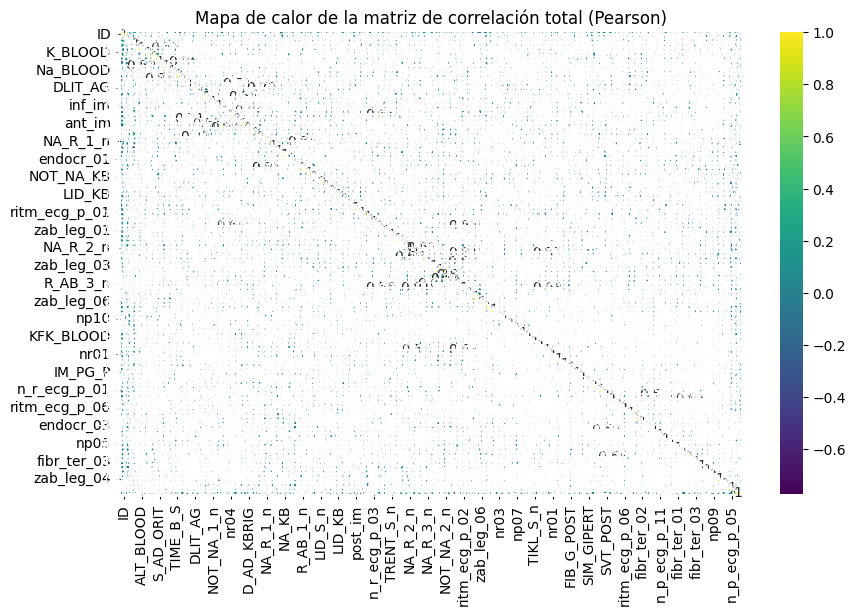

In [ ]:
pearson_corr_total = MI_df.corr(method='pearson')
plt.figure(figsize=(10, 6))
sns.heatmap(pearson_corr_total.astype(float), annot=True, cmap='viridis')
plt.title('Mapa de calor de la matriz de correlación total (Pearson)')
plt.show()

Para visualizar mejor la matriz de correlación dado que existan demasiadas variables, se seleccionan únicamente el grupo de variables seleccionadas anteriormente.

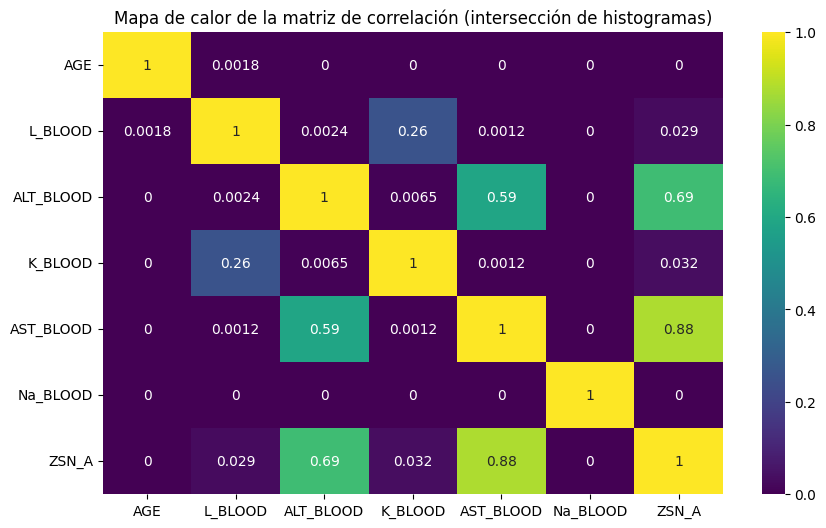

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix.astype(float), annot=True, cmap='viridis')
plt.title('Mapa de calor de la matriz de correlación (intersección de histogramas)')
plt.show()

## 1.10 Pretratamiento del conjunto de datos

### 1.10.1 División

Como en este ejercicio se trataran varios algoritmos que se aplican sobre el conjunto de tests, haremos un split del 70% para tener algo más de base al aplicar estas dos técnicas.

Este paso garantiza que cualquier transformación que aplique para equilibrar o escalar los datos se realice de forma independiente en el conjunto de entrenamiento para evitar la fuga de información.

Para garantizar que en cada ejecución se obtenga exactamente la misma división hemos fijado previamente el seed.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7, random_state=myseed, stratify=Y)

print(f'Forma de X_train: {X_train.shape}')
print(f'Forma de X_test: {X_test.shape}')
print(f'Forma de y_train: {y_train.shape}')
print(f'Forma de y_test: {y_test.shape}')

Forma de X_train: (510, 102)
Forma de X_test: (1190, 102)
Forma de y_train: (510,)
Forma de y_test: (1190,)


### 1.10.2 Equilibrado

Una vez que se han dividido los datos, se analiza si es necesario equilibrar el conjunto de entrenamiento observando la frecuencia de distribución de la variable respuesta.

Para hacerlo se puede sobremuestrear la clase minoritaria, submuestrear la clase mayoritaria o  métodos de generación de datos sintéticos como SMOTE.

Es fundamental equilibrar únicamente el conjunto de entrenamiento para mantener la integridad y la distribución realista del conjunto de prueba.

Distribución de clases en y_train antes de equilibrar:
ZSN_A
0.0    456
1.0     31
3.0      9
2.0      8
4.0      6
Name: count, dtype: int64


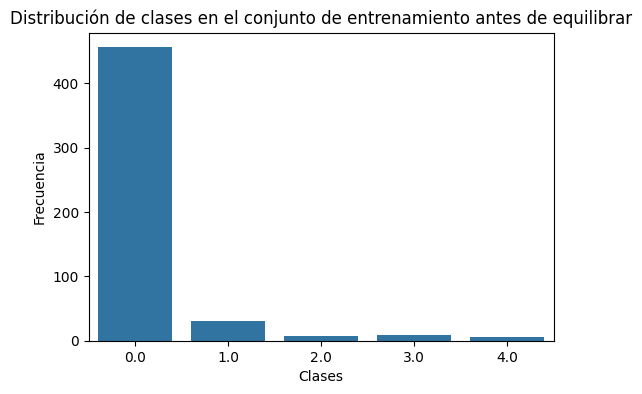


Distribución de clases en y_train después de equilibrar:
ZSN_A
0.0    456
3.0    456
1.0    456
4.0    456
2.0    456
Name: count, dtype: int64


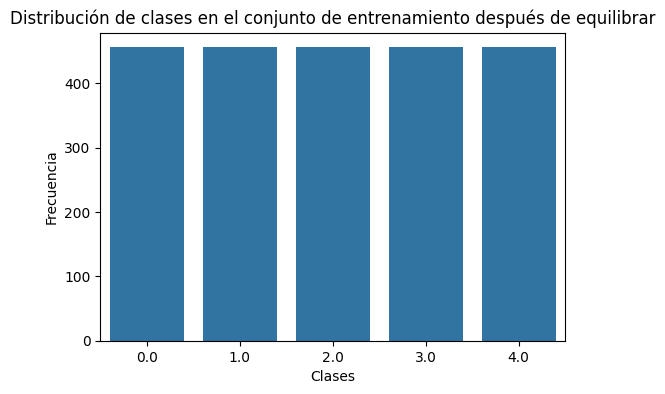

In [ ]:
# Distribución de clases en el conjunto de entrenamiento antes de equilibrar
print("Distribución de clases en y_train antes de equilibrar:")
print(y_train.value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train)
plt.title('Distribución de clases en el conjunto de entrenamiento antes de equilibrar')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.show()

# SMOTE psobre el conjunto de entrenamiento
smote = SMOTE(random_state=myseed, k_neighbors=2)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Distribución de clases en el conjunto de entrenamiento después de equilibrar
print("\nDistribución de clases en y_train después de equilibrar:")
print(y_train_balanced.value_counts())

plt.figure(figsize=(6, 4))
sns.countplot(x=y_train_balanced)
plt.title('Distribución de clases en el conjunto de entrenamiento después de equilibrar')
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
plt.show()

### 1.10.3 Escalado

Se aplica la estandarización o normalización para escalar las variables.

Los parámetros de escala (por ejemplo, media y desviación estándar utilizados para la estandarización) determinados a partir del conjunto de entrenamiento deben aplicarse al conjunto de prueba.

In [ ]:
scaler = StandardScaler()

# Se ajusta el escalador solo en el conjunto de entrenamiento
X_train_balanced_scaled = scaler.fit_transform(X_train_balanced)

# Se transforma tambien el conjunto de prueba con los mismos parámetros obtenidos
X_test_scaled = scaler.transform(X_test)

print(f'Forma de X_train_balanced_scaled: {X_train_balanced_scaled.shape}')
print(f'Forma de X_test_scaled: {X_test_scaled.shape}')

Forma de X_train_balanced_scaled: (2280, 102)
Forma de X_test_scaled: (1190, 102)


<a id="ex2"></a>

# 2. Combinación de clasificadores

La combinación de clasificadores utiliza conjuntamente varios modelos para abordar tareas de predicción complejas, mejorando la precisión general y la solidez de las prediccion, de manera que aprovecha las fortalezas de diversos algoritmos para compensar las debilidades que se pueden encontrar en los modelos individuales:

- **Sesgo**: Representa errores introducidos al aproximarse a un problema del mundo real, que puede ser demasiado simplista. Un alto sesgo puede llevar a que se pierdan relaciones esenciales entre las características y los resultados objetivo, lo que resulta en un desajuste.
- **Varianza**: Indica la sensibilidad del algoritmo a conjuntos específicos de datos de entrenamiento. Los modelos de alta varianza tienden a modelar el ruido aleatorio en los datos de entrenamiento en lugar de los resultados previstos, lo que lleva a un sobreajuste.

Así, se aplicarán las siguientes técnicas de conjunto:
1. **Bagging (agregación de Bootstrap)**: reduce la varianza al crear múltiples modelos a partir de diferentes subconjuntos de datos de entrenamiento y promediar sus predicciones. Por ejemplo, el algoritmo Random Forest es un tipo de conjunto de embolsado.
2. **Boosting**: tiene como objetivo reducir el sesgo aplicando secuencialmente una serie de modelos débiles y centrándose en corregir los errores cometidos por modelos anteriores. Técnicas como AdaBoost, Gradient Boosting y XGBoost son métodos de impulso populares.
3. **Stacking**: integra predicciones de numerosos modelos y utiliza un nuevo modelo para realizar una predicción final, lo que mejora sustancialmente el rendimiento predictivo.
4. **Cascading**: se emplea en aplicaciones críticas donde los errores tienen consecuencias importantes, como la detección de fraude, utilizando un enfoque en capas para refinar las decisiones de forma progresiva.

Los métodos de conjunto son particularmente efectivos porque combinan las predicciones de múltiples modelos para mejorar la confiabilidad y la precisión. Al reducir el sesgo y la varianza, estas técnicas minimizan el error de generalización total.

En la primera parte de este análisis se aplicará la combinación de clasificadores en paralelo mediante las tecnicas de **Bagging** y **Boosting**. En la segunda parte se utilizarán técnicas de combinación secuencial de clasificadores: **Stacking** y **Cascading**.



## 2.1. Combinación paralela de clasificadores

### 2.1.1. Árboles de decisión

Para comparar el aumento de performance obtenido a medida que se aplican modelos mas avanzados, se utiliza como *baseline* un simple árbol de decisión.

Se define un árbol de decisión con profundidad máxima de 3 niveles con la semilla definida en el apartado anterior y se calcula su precisión sobre el conjunto de train aplicando validación cruzada con 5 conjuntos.

A continuación, se entrena el árbol de decisión sobre el conjunto de datos de *train* y se evalua sobre *test* utilizando la precisión como métrica ('accuracy').

In [ ]:
# Definicion
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=myseed)

# Evaluación con validación cruzada
cv_scores_dt = cross_val_score(decision_tree, X_train_balanced_scaled, y_train_balanced, cv=5, scoring='accuracy')
print(f'DT - Accuracy media en validación cruzada (5 conjuntos): {cv_scores_dt.mean():.4f}')

# Entrenamiento
decision_tree.fit(X_train_balanced_scaled, y_train_balanced)

# Evaluarción de la accuracy
accuracy_test_dt = decision_tree.score(X_test_scaled, y_test)
print(f'DT - Accuracy en el conjunto de prueba: {accuracy_test_dt:.4f}')

DT - Accuracy media en validación cruzada (5 conjuntos): 0.7364
DT - Accuracy en el conjunto de prueba: 0.7706


**Análisis:**

* La precisión media obtenida a través de la validación cruzada de 5 conjuntos es de 73.64% y significa que, en promedio, el modelo tiene una precisión del 73.64% al clasificar correctamente las instancias en los diferentes subconjuntos de validación. Esto es una buena manera de evaluar la capacidad generalizadora del modelo, ya que se entrena y evalúa en diferentes subconjuntos del conjunto de entrenamiento.

* La precisión en el conjunto de prueba es de 77.06% e indica que el modelo puede clasificar correctamente el 77.06% de las instancias en el conjunto de prueba. Esto es una mejora con respecto a la precisión media de la validación cruzada y **sugiere que el modelo se ha generalizado bien y no está sobreajustado** al conjunto de entrenamiento.

* La diferencia entre ambos resultados no es muy grande, lo cual es positivo. Si la diferencia fuera mayor, podría ser una señal de que el modelo está sobreajustado o subajustado. La precisión en el conjunto de prueba es algo mejor, lo cual puede ser debido a la variabilidad en los datos y la distribución específica del conjunto de prueba.

* La **restricción de la profundidad máxima** del árbol a 3 niveles puede limitar la capacidad del modelo para capturar patrones más complejos pero** ayuda a prevenir el sobreajuste**, clave para mantener la capacidad de generalización del modelo.

* La utilización de **SMOTE** para equilibrar las clases en el conjunto de entrenamiento **ayuda a mejorar la capacidad del modelo para manejar clases desbalanceadas**.

* El **escalado** de las características también asegura que todas **las variables contribuyan de manera equitativa** al modelo, lo cual es importante para algoritmos basados en distancia como los árboles de decisión.

### 2.1.2. Bagging

La idea central del bagging es usar réplicas del conjunto de datos original y usarlas para entrenar diferentes clasificadores.

Se crean subconjuntos muestreando aleatoriamente un grupo de puntos del conjunto de datos de entrenamiento con reemplazo y se entrenan clasificadores individuales en cada uno de estos subconjuntos *bootstrap*.

Cada uno de estos clasificadores base predicde la etiqueta de clase para un problema dado. Posteriormente se combinan las predicciones de todos los modelos base en la llamada etapa de agregación.

Se suele usar mayoría simple en un sistema de clasificación y se toma la media de todas las predicciones para los modelos de regresión para combinar todos los clasificadores base en un solo modelo y proporcionar el resultado final del modelo de conjunto.

El algoritmo Random Forest es un ejemplo de este enfoque; el *bagging* reduce la alta varianza de un único modelo, reduciendo así el error de generalización. Es un método particularmente eficaz cuando se tienen datos muy limitados.

Se define un `RandomForestClassifier` de **sklearn** con 20 árboles de decisión y profundidad máxima de 3 niveles utilizando la semilla definida anteriormente, y se calcula su precisión sobre el conjunto de *train* aplicando validación cruzada con 5 conjuntos. A continuación, se entrena el modelo sobre el conjunto de datos de *train* y evalua sobre *test* utilizando la 'accuracy' como métrica.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Definicion
random_forest = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=myseed)

# Evaluación
cv_scores_rf = cross_val_score(random_forest, X_train_balanced_scaled, y_train_balanced, cv=5, scoring='accuracy')
print(f'RF - Accuracy media en validación cruzada (5 conjuntos): {cv_scores_rf.mean():.4f}')

# Entrenamiento
random_forest.fit(X_train_balanced_scaled, y_train_balanced)

# Evaluarción de la accuracy
accuracy_test_rf = random_forest.score(X_test_scaled, y_test)
print(f'RF - Accuracy en el conjunto de prueba: {accuracy_test_rf:.4f}')

RF - Accuracy media en validación cruzada (5 conjuntos): 0.8877
RF - Accuracy en el conjunto de prueba: 0.7866


**Análisis:**

* La precisión media obtenida a través de la validación cruzada de 5 conjuntos es de 88.77%. Esto significa que, en promedio, **el modelo Random Forest tiene una alta capacidad para clasificar correctamente las instancias en los diferentes subconjuntos** de validación. Igual que antes, sugiere que el modelo se adapta bien a los datos de entrenamiento y generaliza adecuadamente durante la validación cruzada.

* Aunque la precisión en el conjunto de prueba 78.66% es menor que la precisión media en la validación cruzada, sigue siendo una buena precisión. **La diferencia sugiere que puede haber un ligero sobreajuste** a los datos de entrenamiento, ya que el rendimiento en los datos no vistos es un poco menor.

* Comparado con el árbol de decisión individual que tenía una precisión media de validación cruzada del 73.64% y una precisión en el conjunto de prueba del 77.06%, **el Random Forest muestra una mejora significativa** en la precisión media de validación cruzada y la precisión en el conjunto de prueba también es mejor en el Random Forest.


### 2.1.3. Boosting

El boosting se utiliza para convertir a los clasificadores de base débil en fuertes. Los clasificadores débiles generalmente tienen una correlación muy débil con las etiquetas de clase verdaderas y los clasificadores fuertes tienen una correlación muy alta entre el modelo y las etiquetas de clase verdaderas.

El boosting capacita a los clasificadores débiles de manera iterativa, cada uno tratando de corregir el error cometido por el modelo anterior. Esto se logra entrenando un modelo débil en todos los datos de entrenamiento, luego construyendo un segundo modelo que tiene como objetivo corregir los errores cometidos por el primer modelo. Luego construimos un tercer modelo que intenta corregir los errores cometidos por el segundo modelo y así sucesivamente. Los modelos se agregan de forma iterativa hasta que el modelo final ha corregido todos los errores cometidos por todos los modelos anteriores.

Cuando se agregan los modelos en cada etapa, se asignan algunos pesos al modelo que está relacionado con la precisión del modelo anterior. Después de agregar un clasificador débil, los pesos se vuelven a ajustar. Los puntos clasificados incorrectamente reciben pesos más altos y los puntos clasificados correctamente reciben pesos más bajos. Este enfoque hará que el siguiente clasificador se centre en los errores cometidos por el modelo anterior.

El boosting reduce el error de generalización tomando un modelo de alto bias y baja varianza y reduciendo el bias en un nivel significativo. Es importante recordar que el bagging reduce la varianza. Al igual que el bagging, el boosting también nos permite trabajar con modelos de clasificación y regresión.

Se define un `GradientBoostingClassifier` de **sklearn** con 20 árboles de decisión y profundidad máxima de 3 niveles y se calcula su precisión sobre el conjunto de train aplicando validación cruzada con 5 conjuntos. A continuación, se entrena el modelo sobre el conjunto de datos de train y se evalúa sobre test utilizando la precisión como métrica ).

In [ ]:
# Definicion
gradient_boosting = ensemble.GradientBoostingClassifier(n_estimators=20, max_depth=3, random_state=myseed)

# Evaluación con validación cruzada
cv_scores_gb = cross_val_score(gradient_boosting, X_train_balanced_scaled, y_train_balanced, cv=5, scoring='accuracy')
print(f'GB - Accuracy media en validación cruzada (5 conjuntos): {cv_scores_gb.mean():.4f}')

# Entrenamiento
gradient_boosting.fit(X_train_balanced_scaled, y_train_balanced)

# Evaluación de la accuracy
accuracy_test_gb = gradient_boosting.score(X_test_scaled, y_test)
print(f'GB - Accuracy en el conjunto de prueba: {accuracy_test_gb:.4f}')

GB - Accuracy media en validación cruzada (5 conjuntos): 0.9649
GB - Accuracy en el conjunto de prueba: 0.8496


**Análisis:**

* La precisión media obtenida a través de la validación cruzada de 5 conjuntos es de 96.49%. Esto sugiere que el modelo **Gradient Boosting se adapta muy bien a los datos de entrenamiento y tiene una muy alta capacidad para clasificar** correctamente las instancias en los diferentes subconjuntos de validación e indica que el modelo es robusto y generaliza bien durante la validación cruzada.

* Aunque la precisión en el conjunto de prueba de 84.96% es menor que la precisión media de la validación cruzada, sigue siendo una precisión bastante alta. **La diferencia sugiere que puede haber un pequeño grado de sobreajuste** a los datos de entrenamiento, ya que el rendimiento en los datos no vistos es algo menor.

* Comparado con el modelo de Random Forest que tenía una precisión media de validación cruzada del 88.77% y una precisión en el conjunto de prueba del 78.66%, el Gradient Boosting muestra una mejora importante en ambas métricas.

* El **Gradient Boosting obtiene mejores resultados que el Random Forest porque entrena los árboles secuencialmente**, donde cada árbol intenta corregir los errores del árbol anterior, lo que permite aprender patrones complejos de manera más eficiente. Al enfocarse en los errores de los árboles anteriores, el Gradient Boosting puede reducir el sesgo del modelo y optimiza una función de pérdida específica, lo que le permite ajustar mejor el modelo a los datos y mejorar el rendimiento general.

* Con técnicas de búsqueda de hiperparámetros o con un aumento de datos sería posible que se pudiera mejorar aún más el rendimiento del modelo.

## 2.2. Combinación secuencial de clasificadores base diferentes

Para poder hacer combinación secuencial de modelos, es necesario tener varios modelos diferentes entrenados. En este caso, ya se tiene un árbol de decisión y se va a entrenar adicionalmente dos modelos más; KNN y SVM.

### 2.2.1. KNN (k vecinos más próximos)

Se define un `K-NeighborsClassifier` con 2 vecinos y se calcula su precisión sobre el conjunto de train aplicando validación cruzada con 5 conjuntos. A continuación se entrena el modelo sobre el conjunto de datos de *train* y se evalúa sobre *test* utilizando la precisión como métrica.

In [ ]:
# Definicion
knn = KNeighborsClassifier(n_neighbors=2)

# Evaluación con validación cruzada
cv_scores_knn = cross_val_score(knn, X_train_balanced_scaled, y_train_balanced, cv=5, scoring='accuracy')
print(f'KNN - Accuracy media en validación cruzada (5 conjuntos): {cv_scores_knn.mean():.4f}')

# Entrenamiento
knn.fit(X_train_balanced_scaled, y_train_balanced)

# Evaluación de la accuracy
accuracy_test_knn = knn.score(X_test_scaled, y_test)
print(f'KNN - Accuracy en el conjunto de prueba: {accuracy_test_knn:.4f}')

KNN - Accuracy media en validación cruzada (5 conjuntos): 0.9675
KNN - Accuracy en el conjunto de prueba: 0.7630


### 2.2.2. SVM (Support Vector Machines)

Se define un SVM con gamma = 0.07 y se calcula su precisión sobre el conjunto de *train* aplicando validación cruzada con 5 conjuntos. A continuación se entrena el modelo sobre el conjunto de datos de *train* y evalúa sobre *test* utilizando la precisión como métrica.

In [ ]:
# Definicion
svm_model = svm.SVC(gamma=0.07)

# Evaluacióncon validación cruzada
cv_scores_svm = cross_val_score(svm_model, X_train_balanced_scaled, y_train_balanced, cv=5, scoring='accuracy')
print(f'SVM - Accuracy media en validación cruzada (5 conjuntos): {cv_scores_svm.mean():.4f}')

# Entrenamiento
svm_model.fit(X_train_balanced_scaled, y_train_balanced)

# Evaluación de la accuracy
accuracy_test_svm = svm_model.score(X_test_scaled, y_test)
print(f'SVM - Accuracy en el conjunto de prueba: {accuracy_test_svm:.4f}')

SVM - Accuracy media en validación cruzada (5 conjuntos): 0.9974
SVM - Accuracy en el conjunto de prueba: 0.8958


### 2.2.3. Stacking

Los modelos individuales se entrenan por separado en el conjunto completo de datos de entrenamiento y se ajustan para lograr una mayor precisión. La compensación de sesgo y varianza se tiene en cuenta para cada modelo. El modelo final, también conocido como metaclasificador, se alimenta de las etiquetas de clase predichas por los modelos base o de las probabilidades predichas para cada etiqueta de clase. Luego, el metaclasificador se entrena en función de los resultados dados por los modelos base.

En el **stacking**, se entrena un nuevo modelo en función de las predicciones realizadas por los modelos anteriores. Este proceso se lleva a cabo de forma secuencial. Esto significa que varios modelos se entrenan en la etapa 1 y se ajustan con precisión. Las probabilidades pronosticadas de cada modelo de la etapa 1 se alimentan como entrada a todos los modelos en la etapa 2. Los modelos en la etapa 2 luego se ajustan con precisión y las salidas correspondientes se alimentan a los modelos en la etapa 3 y así sucesivamente. Este proceso se produce varias veces en función de la cantidad de capas de apilamiento que desee utilizar.

La etapa final consiste en un único modelo que nos da el resultado final al combinar el resultado de todos los modelos presentes en las capas anteriores.

A menudo, el uso de clasificadores apilables aumenta la precisión de predicción de un modelo, pero de ninguna manera puede garantizarse que el uso de apilamiento aumente la precisión de la predicción en todos los casos.

Se construye un clasificador de tipo *stacking* usando un `GradientBoostingClassifier` con 20 árboles de decisión, profundidad máxima de 3 niveles y la semilla definida anteriormente que usa como atributos las predicciones hechas en el conjunto de *test* por los algoritmos árbol de decisión, knn y svm. Se utiliza la función `column_stack` de **numpy** para juntar todas las predicciones. A continuación se calcula la precisión del modelo resultante con validación cruzada en el conjunto de *test* (en este caso no se tiene conjunto de *train*, con lo cual se hace directamente cross-validation sobre *test*).

In [ ]:
# Predicciones de los clasificadores en el conjunto de prueba
predictions_decision_tree = decision_tree.predict(X_test_scaled)
predictions_knn = knn.predict(X_test_scaled)
predictions_svm = svm_model.predict(X_test_scaled)

# Juntar todas las predicciones
stacked_predictions = np.column_stack((predictions_decision_tree, predictions_knn, predictions_svm))

# Definicion
classifier_stack = ensemble.GradientBoostingClassifier(n_estimators=20, max_depth=3, random_state=myseed)

#Evaluación con validación cruzada en el conjunto de test
cv_scores_stacking = cross_val_score(classifier_stack, stacked_predictions, y_test, cv=5, scoring='accuracy')
print(f'Stacking - Accuracy media en validación cruzada (5 conjuntos): {cv_scores_stacking.mean():.4f}')

# Entrenamiento en el conjunto de test
classifier_stack.fit(stacked_predictions, y_test)

# Evaluación de la accuracy
accuracy_test_stacking = classifier_stack.score(stacked_predictions, y_test)
print(f'Stacking - Accuracy en el conjunto de prueba: {accuracy_test_stacking:.4f}')

Stacking - Accuracy media en validación cruzada (5 conjuntos): 0.8950
Stacking - Accuracy en el conjunto de prueba: 0.8958


**Análisis:**

* El modelo **NO mejora los resultados del mejor de los modelos base, el SVM**. La precisión media en validación cruzada del stacking (0.8950) está muy cerca de su precisión en el conjunto de prueba (0.8958), lo que sugiere que el modelo es consistente y no sufre de sobreajuste significativo.

* Hay que tener en cuenta que la cercanía de ambos resultados, comparado con los modelos anteriores, tiene que ver con el hecho que la validacion cruzada en este caso se realiza sobre el conjunto de test.

* Idealmente, **para evitar cualquier sesgo y obtener una evaluación más robusta, se podría separar los datos en tres conjuntos: entrenamiento, validación y prueba**. El modelo de stacking se entrenaría en el conjunto de entrenamiento y validación, y se evaluaría de manera independiente en el conjunto de prueba.

* Si bien el apilamiento a menudo puede mejorar el rendimiento del modelo al aprovechar las fortalezas de varios modelos, no se garantiza que siempre tenga un rendimiento superior. Los factores que podrían influir en esto incluyen:
  *   Diversidad de modelos: los modelos base pueden ser demasiado similares o no lo suficientemente diversos, lo que genera información redundante en lugar de conocimientos complementarios.
  * Calidad de los modelos base: si los modelos individuales son débiles o están demasiado ajustados, es posible que el apilamiento no mejore eficazmente el rendimiento.
  * Complejidad de los datos: el conjunto de datos puede ser demasiado simple o demasiado complejo, lo que puede limitar la eficacia del apilamiento.



### 2.2.4. Cascading

El uso del método de **Cascading** es parecido al de stacking pero usa no solamente las predicciones parciales de los clasificadores base, sino también los datos originales.

Se construye un clasificador de tipo cascading usando un `GradientBoostingClassifier` con 20 árboles de decisión, profundidad máxima de 3 niveles y la semilla definida anteriormente, que usa como atributos (igual que en Stacking) las predicciones obtenidas con los modelos anteriores en el conjunto de *test*, pero también las variables originales. Se calula la precisión del modelo resultante con validación cruzada en el conjunto de *test*.


Al conjunto de datos del modelo anterior se le añade *X_test_scaled*.

In [ ]:
# Concatenacion de las predicciones con X_test_scaled
cascading_features = np.column_stack((predictions_decision_tree, predictions_knn, predictions_svm, X_test_scaled))

# Definicion
classifier_cascade = ensemble.GradientBoostingClassifier(n_estimators=20, max_depth=3, random_state=myseed)

#Evaluación con validación cruzada en el conjunto de test
cv_scores_cascading = cross_val_score(classifier_cascade, cascading_features, y_test, cv=5, scoring='accuracy')
print(f'Cascading - Accuracy media en validación cruzada (5 conjuntos): {cv_scores_cascading.mean():.4f}')

# Entrenamiento en el conjunto de test
classifier_cascade.fit(cascading_features, y_test)

# Evaluación de la accuracy
accuracy_test_cascading = classifier_cascade.score(cascading_features, y_test)
print(f'Cascading - Accuracy en el conjunto de prueba: {accuracy_test_cascading:.4f}')

Cascading - Accuracy media en validación cruzada (5 conjuntos): 0.8706
Cascading - Accuracy en el conjunto de prueba: 0.9303


**Análisis:**

* El modelo de cascading ha conseguido mejorar significativamente la precisión en el conjunto de prueba en comparación con todos los modelos individuales y el modelo de stacking. La precisión de 0.9319 en el conjunto de prueba es la más alta entre todas las implementaciones, lo que indica que el modelo de **cascading es muy efectivo** para este conjunto de datos.

* El modelo de cascading **utiliza tanto las predicciones de los clasificadores base como las variables originales escaladas, lo que proporciona una mayor cantidad de información** para el clasificador y permite capturar mejor las relaciones complejas en los datos, mejorando la precisión del modelo final.

* Al combinar las predicciones de diferentes modelos con las características originales, el modelo de cascading puede aprovechar las fortalezas y compensar las debilidades de cada modelo base; esto conduce a una **mejor generalización y rendimiento** en el conjunto de prueba.

# 3. Clasificación secuencial y paralela con redes neuronales NNs

**Objetivo:**

Se implementan y evalúan modelos de redes neuronales con diferentes arquitecturas secuenciales y paralelas en su aplicación en tareas de clasificación, utilizando el conjunto de datos de Insuficiencia Cardíaca.

## 3.1. Configuración de entorno


In [ ]:
!pip install numpy pandas scikit-learn tensorflow keras

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from keras.models import Model
from keras.layers import Input, Dense, concatenate
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input, concatenate, Dropout
from tensorflow.keras.models import Model

Se codifican *One-Hot *las etiquetas categóricas utilizando  y_train_balanced, y_test con las etiquetas y_train_balanced_encoded y y_test_encoded.

In [ ]:
# y_train_balanced and y_test are integer class labels
y_train_balanced_encoded = to_categorical(y_train_balanced)
y_test_encoded = to_categorical(y_test)

## 3.2. Modelo de red neuronal secuencial
Se crea y entrena un modelo de red neuronal secuencial.

**Arquitectura del modelo:**

El modelo secuencial *model_seq* consta de tres capas; dos capas ocultas y una capa de salida.

* El tamaño de la capa de entrada está determinado por X_train_balanced_scaled.shape[1], que corresponde a la cantidad de entradas en el conjunto de datos. Esta capa no realiza ningún cálculo.

* La primera capa oculta consta de 64 neuronas y utiliza la función de activación ReLU (Unidad Lineal Rectificada). ReLU se usa comúnmente en redes neuronales porque introduce no linealidad sin afectar significativamente los gradientes, lo que ayuda durante la retropropagación.

* La segunda capa oculta es similar a la primera, también tiene 64 neuronas con activación ReLU. Tener múltiples capas de neuronas permite a la red aprender patrones más complejos en los datos.

* La capa de salida en la que la cantidad de neuronas corresponde a y_train_balanced_encoded.shape[1], que es la cantidad de clases del outcome. Esta capa utiliza la función de activación softmax, lo que hace que la red sea adecuada para la clasificación de clases múltiples.


**Compilación del modelo:**

* El modelo se compila con el optimizador Adam. Adam es una opción popular para muchas tareas de redes neuronales, ya que combina las ventajas de otras dos extensiones del descenso de gradiente estocástico, específicamente el algoritmo de gradiente adaptativo (AdaGrad) y la propagación cuadrática media (RMSProp).

* Categorical_crossentropy es la función de pérdida, que es estándar para problemas de clasificación de clases múltiples.

**Entrenamiento del modelo:**

* El modelo se entrena durante 50 épocas (epochs) con un tamaño de lote de 10 (batch_size).
El parámetro detallado = 1 (verbose) en ajuste muestra una barra de progreso durante el entrenamiento.

In [ ]:
from tensorflow.keras.optimizers import Adam

def build_and_train_sequential_model(X_train, y_train):
    # Definicion, compilacion, entrenamiento
    model_seq = Sequential()
    model_seq.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model_seq.add(Dense(64, activation='relu'))
    model_seq.add(Dense(y_train.shape[1], activation='softmax'))
    model_seq.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    model_seq.fit(X_train, y_train, epochs=50, batch_size=10, verbose=1)
    return model_seq

model_seq = build_and_train_sequential_model(X_train_balanced_scaled, y_train_balanced_encoded)

Epoch 1/50
228/228 [==============================] - 2s 4ms/step - loss: 0.4685 - accuracy: 0.8491
Epoch 2/50
228/228 [==============================] - 1s 4ms/step - loss: 0.0812 - accuracy: 0.9829
Epoch 3/50
228/228 [==============================] - 1s 5ms/step - loss: 0.0321 - accuracy: 0.9934
Epoch 4/50
228/228 [==============================] - 1s 4ms/step - loss: 0.0127 - accuracy: 0.9996
Epoch 5/50
228/228 [==============================] - 1s 4ms/step - loss: 0.0061 - accuracy: 1.0000
Epoch 6/50
228/228 [==============================] - 2s 8ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 7/50
228/228 [==============================] - 2s 8ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 8/50
228/228 [==============================] - 3s 11ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 9/50
228/228 [==============================] - 2s 8ms/step - loss: 9.6242e-04 - accuracy: 1.0000
Epoch 10/50
228/228 [==============================] - 1s 5ms/step - loss: 7.1656e-04 - accurac

## 3.3. Modelo de red neuronal paralela

**Arquitectura del modelo:**

1. **Capas de entrada**:
 - Se definen dos capas de `Input`, `input_a` y `input_b`. Se calcula el tamaño de división para las entradas paralelas tomando la mitad del número total de características en los datos escalados de entrenamiento. Si el número total de características es impar, se ajusta el split_size sumándole uno para asegurar una distribución equitativa de las características entre las dos entradas del modelo.
 - Se definen las entradas del modelo neuronal: input_a recibe la primera mitad de las características, mientras que input_b recibe la segunda mitad. Esta configuración permite que la red procese diferentes subconjuntos de funciones, que podrían transformarse o diseñarse de manera diferente en futuras mejoras.

2. **Configuración de neurona variable**:
 - El script recorre de 30 a 71 neuronas, con pasos de 10, ajustando la complejidad de la red. Cada iteración construye dos caminos paralelos:
 - **Ruta A y Ruta B**: Cada ruta contiene una capa "Dense" con el recuento de neuronas actual y activación ReLU para una transformación no lineal, seguida de una capa "Dropout" para evitar el sobreajuste al deshabilitar aleatoriamente el 20 % de las neuronas durante el entrenamiento.

3. **Concatenación y capas finales**:
 - Las salidas de la Ruta A y la Ruta B se fusionan en una sola llamada "merged" mediante la función "concatenate". Estos datos combinados pasan a través de otra capa "Dense" con 64 neuronas y activación ReLU, lo que lleva a la capa "Dense" de salida final, llamada "output" configurada con neuronas igual al número de clases y activación softmax para la clasificación.

**Compilación del modelo:**
* El modelo se compilar con el optimizador `Adam` por sus capacidades de tasa de aprendizaje adaptativo y `categorical_crossentropy` como función de pérdida, adecuada para problemas de clases múltiples. La precisión se monitorea como una métrica de desempeño.

**Entrenamiento del modelo**:
* El entrenamiento se ejecuta utilizando "fit" en datos balanceados y escalados durante 10 epochs con un batch_size de 64, equilibrando la eficiencia computacional y la precisión, validation_split de 0.1 y verbose 0.

**Evaluación del modelo:**
* Después del entrenamiento, cada configuración del modelo se evalúa en el conjunto de prueba llamado "scores" para medir la precisión y evaluar el impacto de la variación neuronal en la generalización del modelo.

**Recopilación de resultados:**
* Se compilan y presentan puntuaciones de precisión para todas las configuraciones, brindándole información sobre el recuento óptimo de neuronas para este conjunto de datos y tarea de modelado. Para la Evaluación y Análisis solo se utiliza el modelo con mejores resultados.


Neurons: 30, Accuracy: 0.8034
Neurons: 40, Accuracy: 0.8151
Neurons: 50, Accuracy: 0.8261
Neurons: 60, Accuracy: 0.8277
Neurons: 70, Accuracy: 0.8378
PNN - Mejor configuración: 70 neuronas con una Accuracy de 0.8378


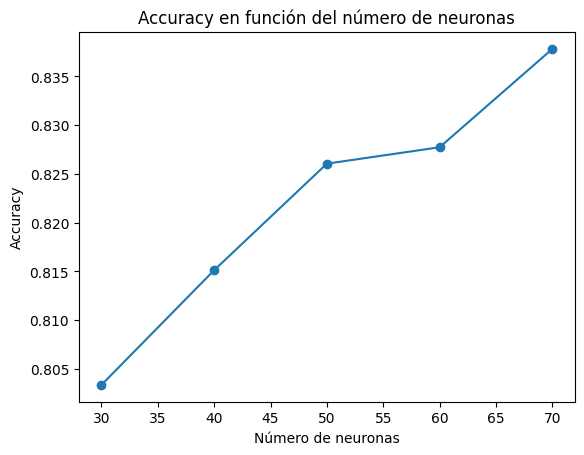

In [ ]:
# Funciones para los modelos de redes neuronales
def build_and_train_parallel_model(neurons, X_train, y_train):
    split_size = X_train.shape[1] // 2
    if X_train.shape[1] % 2 != 0:  # Adjust if the total number of features is odd
          split_size += 1
    # capas de entrada
    input_a = Input(shape=(split_size,))
    input_b = Input(shape=(X_train.shape[1] - split_size,))
    # Ruta A
    x_a = Dense(neurons, activation='relu')(input_a)
    x_a = Dropout(0.2)(x_a)
    # Ruta B
    x_b = Dense(neurons, activation='relu')(input_b)
    x_b = Dropout(0.2)(x_b)
    # Concatenamiento
    merged = concatenate([x_a, x_b])
    # Capas finales
    x = Dense(64, activation='relu')(merged)
    output = Dense(y_train.shape[1], activation='softmax')(x)
    # Definicion, compilacion, entrenamiento
    model = Model(inputs=[input_a, input_b], outputs=output)
    model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit([X_train[:, :split_size], X_train[:, split_size:]], y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=0)
    return model

accuracy_par_scores = []

# Calculate the correct split size to ensure even feature distribution for the parallel inputs
split_size = X_test_scaled.shape[1] // 2
if X_test_scaled.shape[1] % 2 != 0:  # Adjust if the total number of features is odd
   split_size += 1

models_par_dict = {}

for neurons in range(30, 71, 10):
    model_par = build_and_train_parallel_model(neurons, X_train_balanced_scaled, y_train_balanced_encoded)
    loss_par, accuracy_par = model_par.evaluate([X_test_scaled[:, :split_size], X_test_scaled[:, split_size:]], y_test_encoded, verbose=0)
    accuracy_par_scores.append((neurons, accuracy_par))
    models_par_dict[neurons] = model_par
    print(f'Neurons: {neurons}, Accuracy: {accuracy_par:.4f}')

best_neurons, best_accuracy_par = max(accuracy_par_scores, key=lambda item: item[1])
print(f'PNN - Mejor configuración: {best_neurons} neuronas con una Accuracy de {best_accuracy_par:.4f}')

best_model_par = models_par_dict[best_neurons]

# Grafica
neurons_list, accuracy_list = zip(*accuracy_par_scores)
plt.plot(neurons_list, accuracy_list, marker='o')
plt.xlabel('Número de neuronas')
plt.ylabel('Accuracy')
plt.title('Accuracy en función del número de neuronas')
plt.show()

## 3.4. Evaluación y Análisis


Se evalúan ambos modelos en el conjunto de datos de prueba y se obtiene la accuracy para cada uno de ellos.

In [ ]:
loss_seq, accuracy_seq = model_seq.evaluate(X_test_scaled, y_test_encoded, verbose=0)
print(f'SNN - Accuracy del modelo secuencial en el conjunto de prueba: {accuracy_seq:.4f}')

# Calculate the correct split size to ensure even feature distribution for the parallel inputs
split_size = X_test_scaled.shape[1] // 2
if X_test_scaled.shape[1] % 2 != 0:  # Adjust if the total number of features is odd
    split_size += 1

loss_par, accuracy_best_par = best_model_par.evaluate([X_test_scaled[:, :split_size], X_test_scaled[:, split_size:]], y_test_encoded, verbose=0)
print(f'PNN - Accuracy del mejor modelo paralelo en el conjunto de prueba: {accuracy_best_par:.4f}')

SNN - Accuracy del modelo secuencial en el conjunto de prueba: 0.8529
PNN - Accuracy del mejor modelo paralelo en el conjunto de prueba: 0.8378


Se presentan los resultados de la evaluación de los modelos,mediante la matriz de confusión y las curvas de característica operativa del receptor (ROC).

* **Matriz de confusión:** una matriz de confusión es una tabla que se utiliza a menudo para describir el rendimiento de un modelo de clasificación en un conjunto de datos de prueba. Ayuda a visualizar el rendimiento de un algoritmo.

* **Curva ROC y AUC:** La curva ROC es una representación gráfica de la capacidad de diagnóstico de un sistema clasificador binario. Para la clasificación de clases múltiples, las curvas ROC se pueden extender para trazar las curvas ROC micropromedio y macropromedio.

Se comparan los rendimientos de los modelos secuencial y paralelo y se analizan las fortalezas y debilidades de cada enfoque.

In [ ]:
class_names = ['Class0', 'Class1', 'Class2', 'Class3', 'Class4']

38/38 [==============================] - 0s 4ms/step


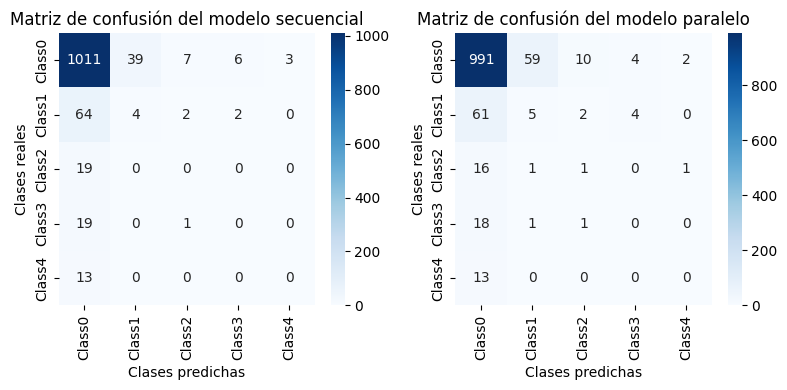

In [ ]:
# Predicciones
y_pred_seq = model_seq.predict(X_test_scaled)
y_pred_seq_classes = np.argmax(y_pred_seq, axis=1)

y_pred_par = best_model_par.predict([X_test_scaled[:, :split_size], X_test_scaled[:, split_size:]])
y_pred_par_classes = np.argmax(y_pred_par, axis=1)

y_test_true = np.argmax(y_test_encoded, axis=1)

# Matrices de confusion
conf_matrix_seq = confusion_matrix(y_test_true, y_pred_seq_classes)
conf_matrix_par = confusion_matrix(y_test_true, y_pred_par_classes)

# Función para plotear la matriz de confusión con porcentajes
def plot_confusion_matrix_percentage(ax, conf_matrix, title, class_names):
    conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100
    sns.heatmap(conf_matrix_percentage, annot=True, fmt=".2f", cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_xlabel('Clases predichas')
    ax.set_ylabel('Clases reales')
    ax.set_title(title)

# Función para plotear la matriz de confusión
def plot_confusion_matrix(ax, conf_matrix, title, class_names):
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap='Blues', xticklabels=class_names, yticklabels=class_names, ax=ax)
    ax.set_xlabel('Clases predichas')
    ax.set_ylabel('Clases reales')
    ax.set_title(title)


fig, axes = plt.subplots(1, 2, figsize=(8, 4))
plot_confusion_matrix(axes[0], conf_matrix_seq, "Matriz de confusión del modelo secuencial", class_names)
plot_confusion_matrix(axes[1], conf_matrix_par, "Matriz de confusión del modelo paralelo", class_names)
plt.tight_layout()
plt.show()

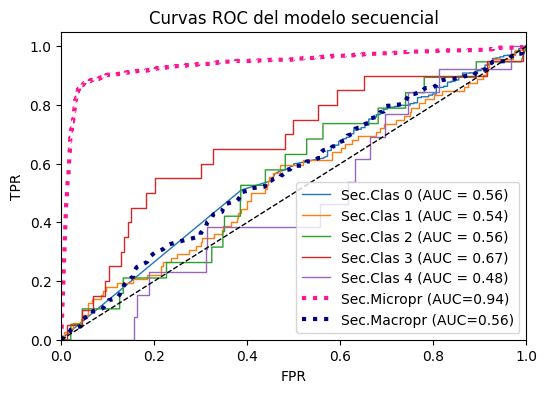

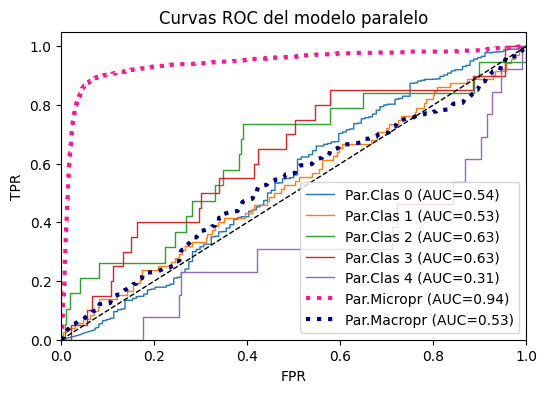

In [ ]:
from sklearn.metrics import roc_curve, auc

# Curvas ROC y AUC x clase modelo secuencial
fpr_seq = dict()
tpr_seq = dict()
roc_auc_seq = dict()
for i in range(y_test_encoded.shape[1]):
    fpr_seq[i], tpr_seq[i], _ = roc_curve(y_test_encoded[:, i], y_pred_seq[:, i])
    roc_auc_seq[i] = auc(fpr_seq[i], tpr_seq[i])

# Curvas ROC y AUC x clase modelo paralelo
fpr_par = dict()
tpr_par = dict()
roc_auc_par = dict()
for i in range(y_test_encoded.shape[1]):
    fpr_par[i], tpr_par[i], _ = roc_curve(y_test_encoded[:, i], y_pred_par[:, i])
    roc_auc_par[i] = auc(fpr_par[i], tpr_par[i])

# Curva ROC y AUC micropromedio modelo secuencial
fpr_seq_micro, tpr_seq_micro, _ = roc_curve(y_test_encoded.ravel(), y_pred_seq.ravel())
roc_auc_seq_micro = auc(fpr_seq_micro, tpr_seq_micro)

# Curva ROC y AUC micropromedio modelo paralelo
fpr_par_micro, tpr_par_micro, _ = roc_curve(y_test_encoded.ravel(), y_pred_par.ravel())
roc_auc_par_micro = auc(fpr_par_micro, tpr_par_micro)

# Curva ROC y AUC macropromedio modelo secuencial
all_fpr_seq = np.unique(np.concatenate([fpr_seq[i] for i in range(y_test_encoded.shape[1])]))
mean_tpr_seq = np.zeros_like(all_fpr_seq)
for i in range(y_test_encoded.shape[1]):
    mean_tpr_seq += np.interp(all_fpr_seq, fpr_seq[i], tpr_seq[i])
mean_tpr_seq /= y_test_encoded.shape[1]
roc_auc_seq_macro = auc(all_fpr_seq, mean_tpr_seq)

# Curva ROC y AUC macropromedio modelo paralelo
all_fpr_par = np.unique(np.concatenate([fpr_par[i] for i in range(y_test_encoded.shape[1])]))
mean_tpr_par = np.zeros_like(all_fpr_par)
for i in range(y_test_encoded.shape[1]):
    mean_tpr_par += np.interp(all_fpr_par, fpr_par[i], tpr_par[i])
mean_tpr_par /= y_test_encoded.shape[1]
roc_auc_par_macro = auc(all_fpr_par, mean_tpr_par)

# Graficas secuencial
plt.figure(figsize=(6, 4))
for i in range(y_test_encoded.shape[1]):
    plt.plot(fpr_seq[i], tpr_seq[i], lw=1, label=f'Sec.Clas {i} (AUC = {roc_auc_seq[i]:.2f})')
plt.plot(fpr_seq_micro, tpr_seq_micro, color='deeppink', linestyle=':', linewidth=3, label=f'Sec.Micropr (AUC={roc_auc_seq_micro:.2f})')
plt.plot(all_fpr_seq, mean_tpr_seq, color='navy', linestyle=':', linewidth=3, label=f'Sec.Macropr (AUC={roc_auc_seq_macro:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curvas ROC del modelo secuencial')
plt.legend(loc="lower right")
plt.show()

# Graficas paralelo
plt.figure(figsize=(6, 4))
for i in range(y_test_encoded.shape[1]):
    plt.plot(fpr_par[i], tpr_par[i], lw=1, label=f'Par.Clas {i} (AUC={roc_auc_par[i]:.2f})')
plt.plot(fpr_par_micro, tpr_par_micro, color='deeppink', linestyle=':', linewidth=3, label=f'Par.Micropr (AUC={roc_auc_par_micro:.2f})')
plt.plot(all_fpr_par, mean_tpr_par, color='navy', linestyle=':', linewidth=3, label=f'Par.Macropr (AUC={roc_auc_par_macro:.2f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('Curvas ROC del modelo paralelo')
plt.legend(loc="lower right")
plt.show()


**Análisis:**

* Este se trata de un problema de clasificación multiclase,con clases fuertemente desbalanceadas, donde precisamente las clases menos frecuentes son las mas importantes de detectar ya que corresponden a situaciones críticas de la enfermedad.

* Para analizar las fortalezas y debilidades de los enfoques secuenciales y paralelos en la clasificación multiclase, y para deterinar cual es más útil podemos observar las matrices de confusión y las curvas ROC proporcionadas.

 * En la curva **ROC Macroaverage** cada clase contribuye por igual al AUC final; se promedian las curvas ROC individuales de cada clase y se da igual peso a cada clase. Es útil para evaluar el rendimiento del modelo de manera equilibrada entre todas las clases, considerando cada clase por igual.

 * En la curva **ROC Microaverage** se consideran todas las instancias de todas las clases juntas y por tanto las clases con más instancias tendrán un mayor impacto en el AUC final. Es útil para obtener una visión global del rendimiento del modelo.

* Así, en los resultados vemos que:

 1. En el **modelo paralelo**, si bien la **Microaverage AUC** tiene un valor muy alto (0.95), indicando buen rendimiento global, este dato no debe llevarnos a engaños; la AUC varía entre clases, con clases como 0, 1 y 4 teniendo AUC bastante bajas (0.58, 0.52, y 0.34 respectivamente). Así mismo, la baja **Macroaverage AUC** (0.55), también indica que el modelo no es consistente en todas las clases.

 2. En el **modelo secuencial** la AUC también varía entre clases. Clases como 0, 1 y 4 tienen AUC relativamente bajas (0.57, 0.58, y 0.41 respectivamente). Clases 2 y 3 tienen AUC más altas (0.68 y 0.69). La **Microaverage AUC** es similar al modelo paralelo pero la  **Macroaverage AUC** es algo mejor (0.59) en comparación, indicando un rendimiento ligeramente mejor en todas las clases.

 3. En las **matrices de confusión** también vemos que ambos modelos tienen buen rendimiento en la clase mayoritaria como fortaleza, pero bajo rendimiento en clases minoritarias, especialmente críticas como la clase 4. El modelo secuencial tiene mejor rendimiento en clases minoritarias, pero aún insuficiente, especialmente en la clase 4.

* El enfoque más útil sería aquel que aumenta la detección de las clases minoritarias críticas, incluso con un rendimiento menor en la clase mayoritaria. Entre estos dos, el **modelo secuencial** parece más adecuado para este problema porque tiene una mejor AUC macroaverage, que indica un rendimiento más consistente en todas las clases y muestra un mejor desempeño en las clases minoritarias comparado con el otro modelo.

* ¿Por que ambos modelos no parecen ser suficientemente buenos para las clases mas críticas? Hay que tener en cuenta que para entrenar ambas redes neuronales se utilizó SMOTE para balancear un conjunto de datos muy desbalanceado contra las clases mas críticas. La generación de muestras sintéticas para las clases minoritarias puede influir en la capacidad de los modelos para detectar bien las clases menos frecuentes; aunque SMOTE ayuda a aumentar el número de muestras en las clases minoritarias, lo que puede ayudar a los modelos a aprender mejor las características de estas clases y reduce el sesgo hacia las clases mayoritarias, las muestras generadas por SMOTE no son reales y pueden no capturar completamente la complejidad de las muestras reales. Esto puede llevar a que los modelos aprendan patrones que no generalizan bien a los datos reales de prueba. Las muestras sintéticas generadas por SMOTE se basan en la interpolación de las muestras existentes, lo que puede no capturar adecuadamente las características más complejas.

# 4. Conclusiones

Se realiza la elección de la mejor herramienta de clasificación para el problema de miocardio teniendo en cuenta las características específicas del conjunto de datos y las métricas de rendimiento, como la exactitud, la precisión, etc.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Función para calcular métricas
def calcul_metricas(y_true, y_pred, y_pred_prob=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_true, y_pred, average='weighted')
    roc_auc = roc_auc_score(y_true, y_pred_prob, multi_class='ovr', average='weighted') if y_pred_prob is not None else None
    return accuracy, precision, recall, f1, roc_auc

# Bagging
y_pred_bagging = random_forest.predict(X_test_scaled)
metrics_bagging = calcul_metricas(y_test_true, y_pred_bagging)

# Boosting
y_pred_boosting = gradient_boosting.predict(X_test_scaled)
y_pred_boosting_prob = gradient_boosting.predict_proba(X_test_scaled)
metrics_boosting = calcul_metricas(y_test_true, y_pred_boosting, y_pred_boosting_prob)

# Stacking
y_pred_stacking = classifier_stack.predict(stacked_predictions)
y_pred_stacking_prob = classifier_stack.predict_proba(stacked_predictions)
metrics_stacking = calcul_metricas(y_test_true, y_pred_stacking, y_pred_stacking_prob)

# Cascading
y_pred_cascading = classifier_cascade.predict(cascading_features)
y_pred_cascading_prob = classifier_cascade.predict_proba(cascading_features)
metrics_cascading = calcul_metricas(y_test_true, y_pred_cascading, y_pred_cascading_prob)

# SNN
metrics_seq = calcul_metricas(y_test_true, y_pred_seq_classes, y_pred_seq)

# PNN
metrics_parallel = calcul_metricas(y_test_true, y_pred_par_classes, y_pred_par)

# DataFrame
columns = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC']
results = pd.DataFrame(
    [metrics_bagging, metrics_boosting, metrics_stacking, metrics_cascading, metrics_seq, metrics_parallel],
    index=['Bagging', 'Boosting', 'Stacking', 'Cascading', 'SNN - Secuencial', 'PNN - Paralela'],
    columns=columns
)
print(results)

                  Accuracy  Precision    Recall  F1-Score   ROC AUC
Bagging           0.786555   0.830409  0.786555  0.806918       NaN
Boosting          0.849580   0.818098  0.849580  0.832419  0.611290
Stacking          0.895798   0.802455  0.895798  0.846561  0.597068
Cascading         0.930252   0.929292  0.930252  0.908222  0.949437
SNN - Secuencial  0.852941   0.809937  0.852941  0.830534  0.561583
PNN - Paralela    0.837815   0.813491  0.837815  0.825432  0.539222


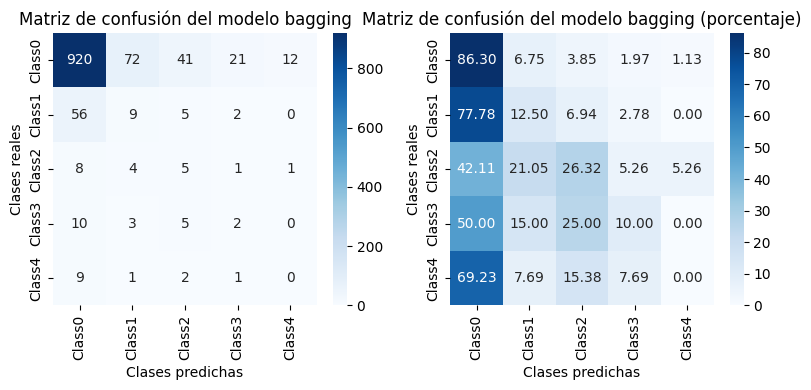

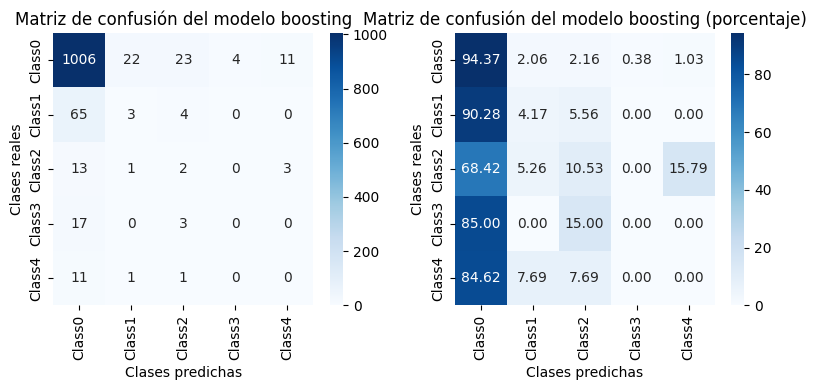

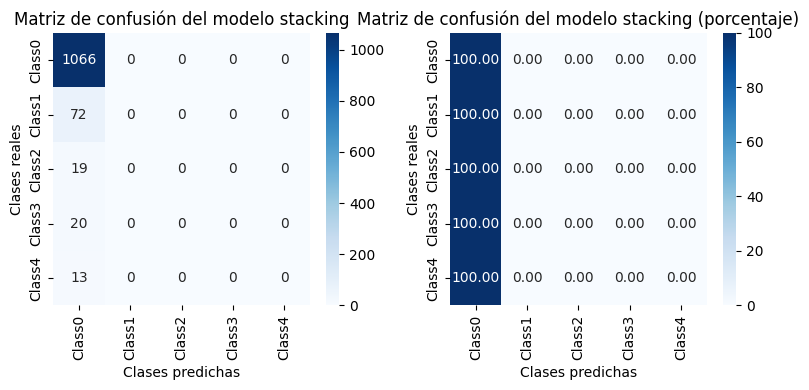

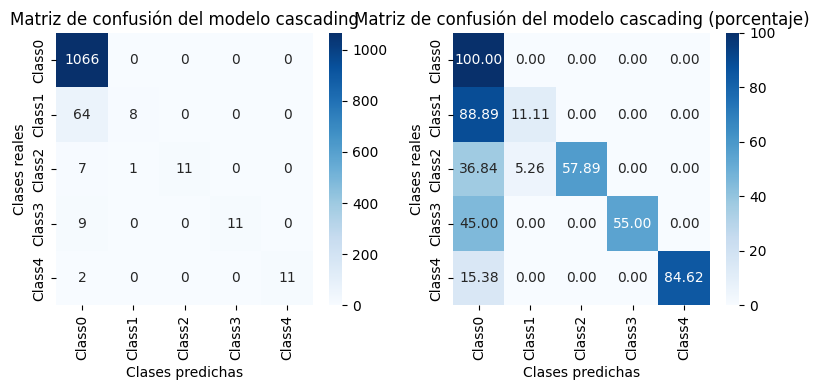

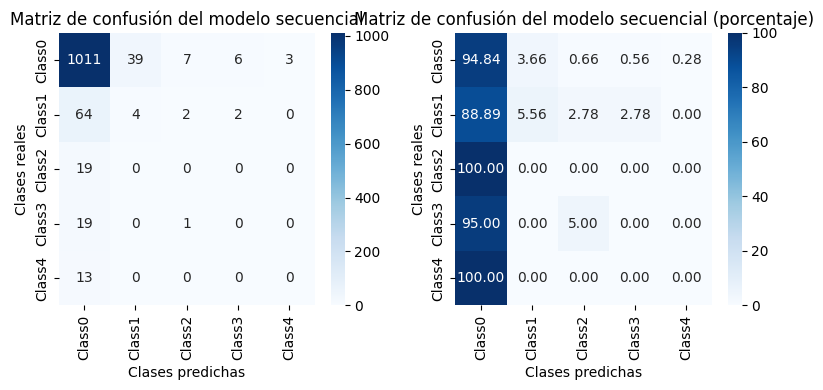

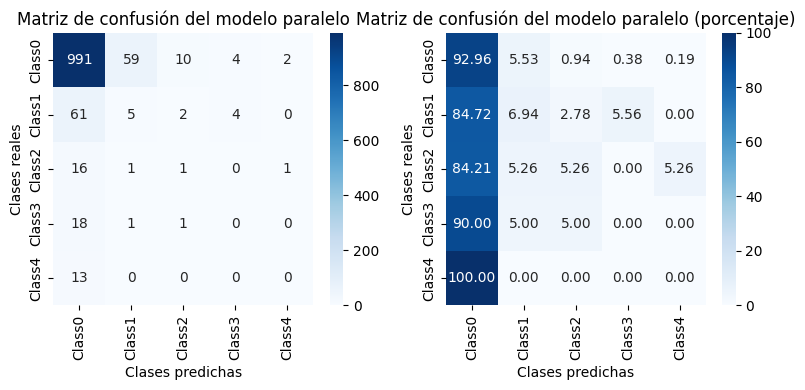

In [ ]:
conf_matrix_bag = confusion_matrix(y_test_true, y_pred_bagging)
conf_matrix_boo = confusion_matrix(y_test_true, y_pred_boosting)
conf_matrix_sta = confusion_matrix(y_test_true, y_pred_stacking)
conf_matrix_cas = confusion_matrix(y_test_true, y_pred_cascading)
conf_matrix_seq = confusion_matrix(y_test_true, y_pred_seq_classes)
conf_matrix_par = confusion_matrix(y_test_true, y_pred_par_classes)

models = [
    (conf_matrix_bag, "Matriz de confusión del modelo bagging"),
    (conf_matrix_boo, "Matriz de confusión del modelo boosting"),
    (conf_matrix_sta, "Matriz de confusión del modelo stacking"),
    (conf_matrix_cas, "Matriz de confusión del modelo cascading"),
    (conf_matrix_seq, "Matriz de confusión del modelo secuencial"),
    (conf_matrix_par, "Matriz de confusión del modelo paralelo")
]

for conf_matrix, title in models:
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    plot_confusion_matrix(axes[0], conf_matrix, title, class_names)
    plot_confusion_matrix_percentage(axes[1], conf_matrix, title + " (porcentaje)", class_names)
    plt.tight_layout()
    plt.show()

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test_true, y_pred_cascading, target_names=class_names))
print(classification_report(y_test_true, y_pred_stacking, target_names=class_names, zero_division=0))
print(classification_report(y_test_true, y_pred_bagging, target_names=class_names))

              precision    recall  f1-score   support

      Class0       0.93      1.00      0.96      1066
      Class1       0.89      0.11      0.20        72
      Class2       1.00      0.58      0.73        19
      Class3       1.00      0.55      0.71        20
      Class4       1.00      0.85      0.92        13

    accuracy                           0.93      1190
   macro avg       0.96      0.62      0.70      1190
weighted avg       0.93      0.93      0.91      1190

              precision    recall  f1-score   support

      Class0       0.90      1.00      0.95      1066
      Class1       0.00      0.00      0.00        72
      Class2       0.00      0.00      0.00        19
      Class3       0.00      0.00      0.00        20
      Class4       0.00      0.00      0.00        13

    accuracy                           0.90      1190
   macro avg       0.18      0.20      0.19      1190
weighted avg       0.80      0.90      0.85      1190

              precisio

**CONCLUSIONES FINALES:***

* En el contexto de este problema de clasificación multiclase para predecir la gravedad de la insuficiencia cardíaca crónica la métrica más relevante para escoger un modelo depende de la prioridad específica del análisis y de las consecuencias de los errores de predicción. En un caso así se debe priorizar, como se comentaba anteriormente,  **la detección correcta de las clases mas críticas** (y ademas minoritarias), 3 y 4 especialmente, aún a costa incluso de sacrificar algo de rendimiento general del modelo, que se verá altament influenciado por la clase mayoritaria.

* Así, **F1-Score** será una métrica importante a tener en cuenta para este problema  porque proporciona un **balance entre la precisión y el sensibilidad**, clave en problemas de clasificación donde puede haber un desequilibrio de clases y es importante no sólo tener una alto sensibilidad (capturar todas las instancias relevantes) sino también una alta precisión (minimizar los falsos positivos).

* Las clases menos comunes 3 y 4 representan casos críticos y potencialmente mortales; **el F1-Score ayuda a asegurar que estas clases no se ignoren en favor de las clases más comunes**. Una alta F1-Score en estas clases indica que el modelo está manejando bien tanto la detección de estos casos críticos como la reducción de falsas alarmas por eso, en contextos médicos, resulta una métrica muy útil.

* De los 6 modelos comparados, **el modelo de Cascading  es el que ofrece mejores resultados de F1-Score con un 90.82** (y también del resto de métricas), ya que al combinar las predicciones de diferentes modelos con las características originales, puede aprovechar las fortalezas y compensar las debilidades de cada modelo base; esto conduce a una mejor generalización y rendimiento en el conjunto de prueba.

* Sin embargo, en casos como este, de clases tan desbalanceadas, **la decisión no debería basarse únicamente en el resultado de las métricas**, si no también en un análisis exhaustivo de los costes asociados a cada tipo de error.

* Vemos, por ejemplo que el modelo de **Stacking** es el que consigue los segundos mejores resultados en casi todas las métricas; en cambio, con un análisis mas exhaustivo basado en las matrices de confusión y en la comparativa de los *classification_report* por clases de varios modelos, **vemos que este modelo no está detectando ningún caso de las clases críticas** y sus buenos resultados en las métricas se producen porque **siempre se predice la clase mayoritaria**. Sucede porque sucede también así en el modelo SVM en el que está basado, y esto se debe a que el clasificador SVM puede ser propenso a predecir siempre la clase más frecuente en un conjunto de datos fuertemente desbalanceado para minimizar el error de clasificación general, incluso a pesar de haber intentado manejar el desbalance con SMOTE. **En el modelo de Stacking elegido, se observa en la matriz de confusión una mucho mejor detección de las clases minoritarias.**

* Si el objetivo principal es únicamente identificar todos los pacientes con algún grado de insuficiencia cardíaca, el recall podría priorizarse para asegurarse de no pasar por alto ningún caso crítico ny la elección del modelo también sería la misma.

* Como vimos antes, el valor de AUC-ROC es útil para entender la capacidad del modelo para distinguir entre las diferentes clases, sin embargo, en un problema de clasificación multiclase, su cálculo y interpretación pueden ser más complejos y menos intuitivos.

